## データ読み込み

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_train=pd.read_csv('train.csv')
df_train.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel


## データ分析

In [37]:
#欠損値の確認
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            199 non-null    int64  
 1   mpg           199 non-null    float64
 2   cylinders     199 non-null    int64  
 3   displacement  199 non-null    float64
 4   horsepower    199 non-null    object 
 5   weight        199 non-null    float64
 6   acceleration  199 non-null    float64
 7   model year    199 non-null    int64  
 8   origin        199 non-null    int64  
 9   car name      199 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 15.7+ KB


In [38]:
#カラムの確認
df_train.columns

Index(['id', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

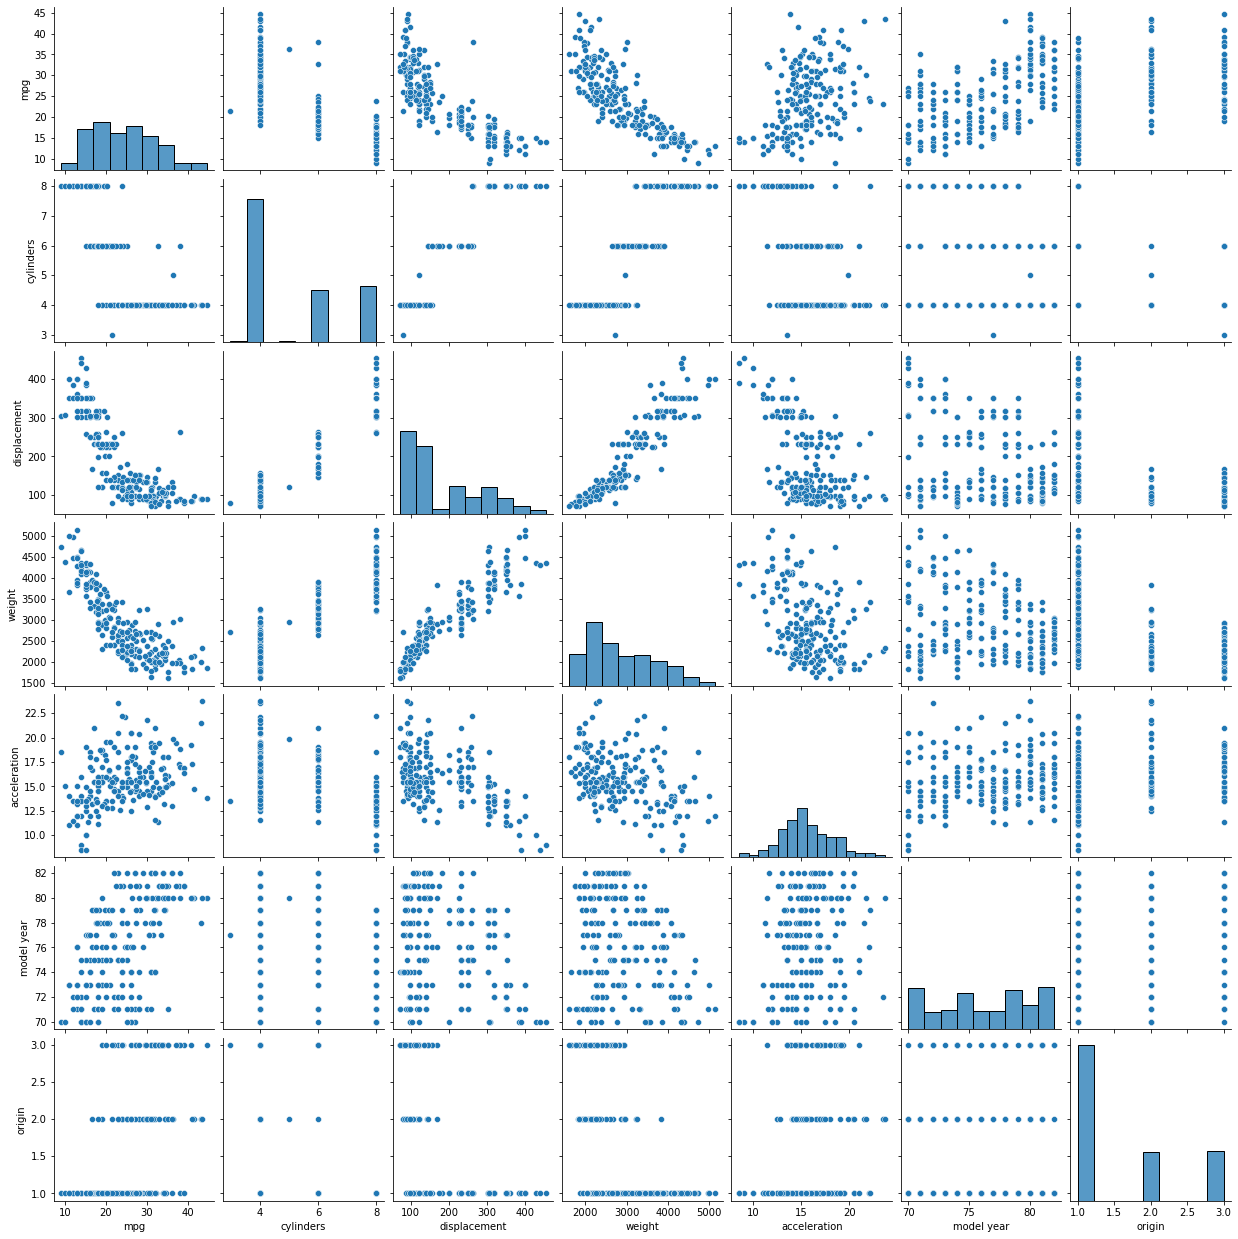

In [39]:
#ペアプロット
sns.pairplot(df_train[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin']])
plt.show()

### 相関係数の確認 
* 'displacement'(排気量) 
* 'weight'(重量) 
* 'acceleration'(加速度) 

排気量、燃費が影響 
 
大きい車は排気量が多い→重いほどエネルギーを多く使う 

* 'displacement'(排気量)と'weight'(重量) の変数間の相関が高い→どちらか削れるかも

<AxesSubplot:>

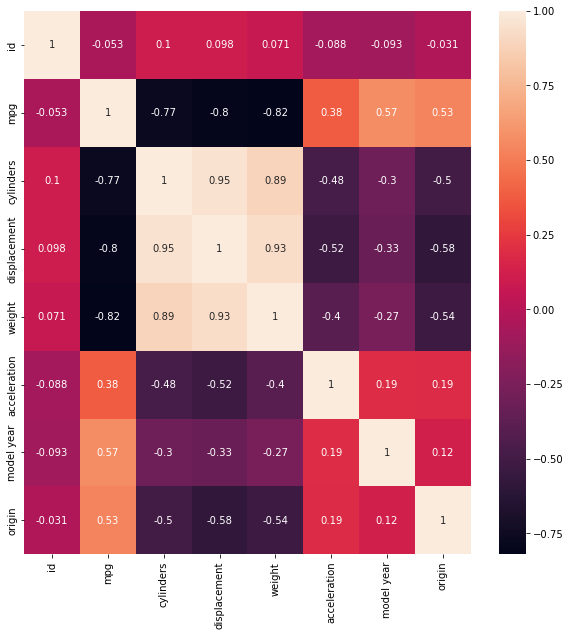

In [40]:
#相関係数ヒートマップ
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True)

### cylinders別のmpgの分布

In [41]:
df_train['cylinders'].unique()

array([4, 6, 8, 5, 3])

In [42]:
df_train.groupby('cylinders')['mpg'].describe()

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
3,1.0,21.500000,NaN,21.5,21.5,21.5,21.500,21.5
4,112.0,29.381250,5.576132,18.0,25.4,28.7,32.925,44.6
5,1.0,36.400000,NaN,36.4,36.4,36.4,36.400,36.4
6,41.0,20.160976,4.226989,15.0,18.0,19.0,21.500,38.0
8,44.0,15.043182,2.870815,9.0,13.0,15.0,16.625,23.9


<AxesSubplot:xlabel='mpg', ylabel='Count'>

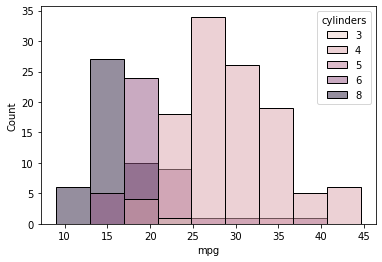

In [43]:
sns.histplot(df_train, x='mpg', hue='cylinders')

### origin別のmpgの分布

In [44]:
df_train['origin'].unique()

array([1, 2, 3])

In [45]:
df_train.groupby('origin')['mpg'].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
1,122.0,20.866393,6.626426,9.0,16.0,19.25,25.400,39.0
2,38.0,29.076316,6.585752,16.5,25.0,28.05,32.725,43.4
3,39.0,30.423077,5.968931,19.0,25.1,31.50,33.750,44.6


<AxesSubplot:xlabel='mpg', ylabel='Count'>

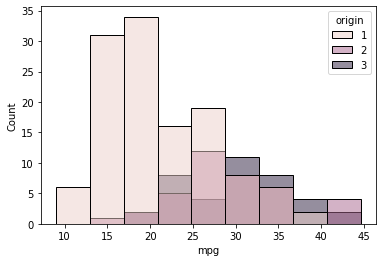

In [46]:
sns.histplot(df_train, x='mpg', hue='origin')

In [117]:
origin1=df_train.query('origin==1')

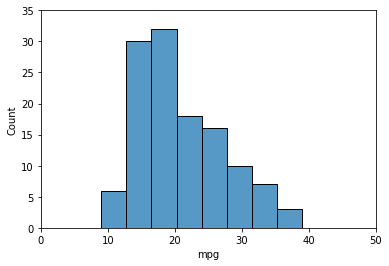

In [119]:
sns.histplot(origin1, x='mpg')
plt.xlim(0,50)
plt.ylim(0,35)
plt.show()

In [125]:
#アメリカ
origin1['car name'].values

array(['dodge aries se', 'dodge colt', 'pontiac phoenix',
       'chevroelt chevelle malibu', 'oldsmobile omega', 'dodge st. regis',
       'dodge omni', 'chevrolet impala', 'amc hornet',
       'chevrolet chevette', 'chevrolet woody', 'ford pinto',
       'mercury cougar brougham', 'chevrolet caprice classic',
       'amc concord dl', 'mercury zephyr 6', 'pontiac safari (sw)',
       'dodge charger 2.2', 'chevrolet chevelle malibu',
       'oldsmobile cutlass ciera (diesel)',
       'chevrolet chevelle malibu classic', 'amc matador',
       'pontiac astro', 'plymouth reliant', 'ford granada l',
       'amc hornet', 'ford pinto (sw)', 'ford pinto', 'chevrolet impala',
       'dodge aspen 6', 'chevrolet nova custom', 'chevy s-10',
       'pontiac j2000 se hatchback', 'capri ii',
       'amc ambassador brougham', 'hi 1200d', 'ford ltd',
       'chevrolet vega (sw)', 'chevrolet monte carlo landau',
       'ford gran torino', 'chevrolet impala', 'dodge colt',
       'plymouth reliant', 'bu

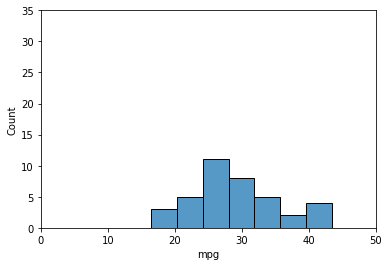

In [120]:
origin2=df_train.query('origin==2')
sns.histplot(origin2, x='mpg')
plt.xlim(0,50)
plt.ylim(0,35)
plt.show()

In [124]:
#ヨーロッパ
origin2['car name'].values

array(['vw rabbit custom', 'bmw 2002', 'mercedes-benz 280s',
       'renault 12 (sw)', 'peugeot 505s turbo diesel',
       'volkswagen scirocco', 'saab 99le',
       'volkswagen rabbit custom diesel', 'opel 1900', 'fiat 124b',
       'volkswagen dasher', 'bmw 320i', 'audi 4000', 'opel 1900',
       'peugeot 504', 'volkswagen model 111', 'volkswagen dasher',
       'vw rabbit', 'volkswagen dasher', 'vokswagen rabbit',
       'volvo 144ea', 'opel manta', 'renault 18i', 'mercedes-benz 240d',
       'fiat 128', 'volkswagen jetta', 'vw rabbit', 'volkswagen type 3',
       'volvo 145e (sw)', 'triumph tr7 coupe', 'fiat x1.9',
       'audi 5000s (diesel)', 'volkswagen 1131 deluxe sedan',
       'renault lecar deluxe', 'saab 99e', 'volkswagen rabbit l',
       'vw dasher (diesel)', 'fiat 124 sport coupe'], dtype=object)

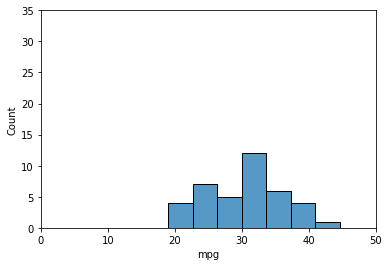

In [121]:
#日本車
origin3=df_train.query('origin==3')
sns.histplot(origin3, x='mpg')
plt.xlim(0,50)
plt.ylim(0,35)
plt.show()

In [123]:
#日本
origin3['car name'].values

array(['toyota mark ii', 'toyota tercel', 'datsun pl510', 'datsun 280-zx',
       'subaru', 'honda accord cvcc', 'toyota starlet',
       'toyota corolla 1200', 'subaru dl', 'mazda 626',
       'honda civic 1300', 'honda civic 1500 gl', 'datsun 510',
       'toyota corolla', 'toyota corolla tercel',
       'toyouta corona mark ii (sw)', 'datsun 200sx', 'datsun 810 maxima',
       'datsun 210', 'honda civic', 'datsun 210 mpg', 'toyota corona',
       'datsun 810', 'datsun f-10 hatchback', 'toyota mark ii',
       'toyota corona', 'datsun 510 (sw)', 'toyota corolla 1200',
       'datsun 200-sx', 'datsun 710', 'toyota celica gt',
       'honda accord lx', 'mazda rx-4', 'mazda glc deluxe',
       'honda prelude', 'toyota corona liftback', 'datsun 1200',
       'toyota corona hardtop', 'datsun 210'], dtype=object)

### weight別のmpgの分布

In [47]:
df_train['weight'].unique()

array([2525., 1925., 2930., 2125., 2050., 2735., 3897., 3664., 2234.,
       3830., 3820., 2230., 2130., 4209., 2945., 2189., 2120., 2164.,
       3230., 2910., 2310., 4295., 2391., 3840., 3035., 2990., 5140.,
       2370., 3329., 3015., 2045., 3781., 1990., 1755., 2660., 1836.,
       3730., 2145., 2542., 2592., 1985., 2490., 2835., 2901., 2395.,
       2639., 4274., 3360., 1760., 1850., 2220., 3278., 2720., 2575.,
       2572., 2300., 3821., 2065., 4732., 2245., 2223., 2600., 1968.,
       4657., 2506., 2188., 2408., 4165., 4141., 4354., 2255., 2123.,
       2615., 2385., 4341., 2957., 4638., 3211., 1834., 3777., 3353.,
       3504., 3563., 1875., 1963., 2020., 1937., 2870., 3070., 3955.,
       2489., 2190., 2150., 4077., 1975., 1845., 1955., 3410., 1649.,
       4140., 2868., 3459., 2670., 3380., 3651., 2320., 2815., 3250.,
       3193., 1945., 4456., 2108., 3940., 2401., 2144., 2254., 4335.,
       2933., 2500., 3907., 2725., 3205., 2000., 4082., 3725., 2051.,
       2950., 2807.,

In [48]:
df_train.groupby('weight')['mpg'].describe()

,count,mean,std,min,25%,50%,75%,max
weight,,,,,,,,
1613.0,1.0,35.0,NaN,35.0,35.0,35.0,35.0,35.0
1649.0,1.0,31.0,NaN,31.0,31.0,31.0,31.0,31.0
1755.0,1.0,39.1,NaN,39.1,39.1,39.1,39.1,39.1
1760.0,1.0,35.1,NaN,35.1,35.1,35.1,35.1,35.1
1773.0,1.0,31.0,NaN,31.0,31.0,31.0,31.0,31.0
...,...,...,...,...,...,...,...,...
4657.0,1.0,14.0,NaN,14.0,14.0,14.0,14.0,14.0
4732.0,1.0,9.0,NaN,9.0,9.0,9.0,9.0,9.0
4955.0,1.0,12.0,NaN,12.0,12.0,12.0,12.0,12.0


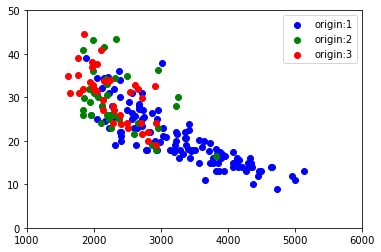

In [73]:
#weightとmpg
#物理の知識から反比例の関係

plt.scatter(df_train.query('origin==1')['weight'], df_train.query('origin==1')['mpg'], c='blue', label='origin:1')
plt.scatter(df_train.query('origin==2')['weight'], df_train.query('origin==2')['mpg'], c='green', label='origin:2')
plt.scatter(df_train.query('origin==3')['weight'], df_train.query('origin==3')['mpg'], c='red', label='origin:3')
plt.xlim(1000,6000)
plt.ylim(0,50)
plt.legend()
plt.show()


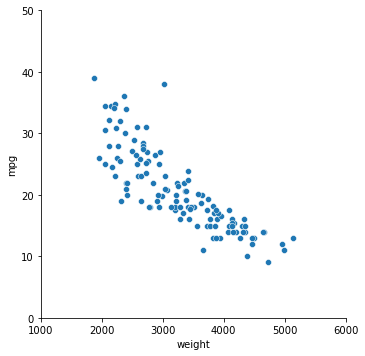

In [72]:
sns.relplot(data=df_train.query('origin == 1'), x='weight', y='mpg',  kind='scatter')
plt.xlim(1000,6000)
plt.ylim(0,50)
plt.show()

In [76]:
#重量と速度の関係の確認
w=df_train.apply(lambda x: x.weight**-0.5, axis=1)

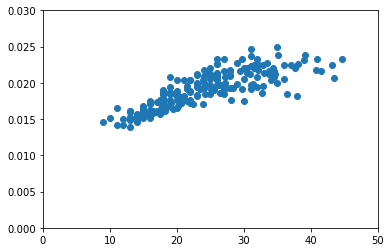

In [78]:
plt.scatter(x=df_train['mpg'], y=w)
plt.xlim(0,50)
plt.ylim(0,0.03)
plt.show()

## 加速度accelerationと燃費mpg

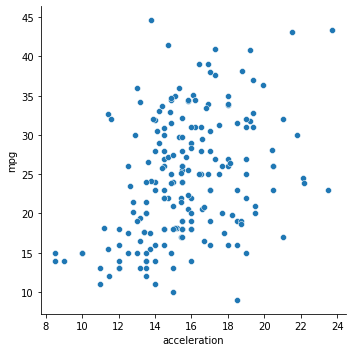

In [82]:
sns.relplot(data=df_train, x='acceleration', y='mpg')
plt.show()

In [84]:
#車種, 外車が多いから日本ではなさそう
df_train['car name'].values

array(['dodge aries se', 'vw rabbit custom', 'toyota mark ii',
       'dodge colt', 'toyota tercel', 'pontiac phoenix',
       'chevroelt chevelle malibu', 'oldsmobile omega', 'bmw 2002',
       'dodge st. regis', 'mercedes-benz 280s', 'dodge omni',
       'datsun pl510', 'chevrolet impala', 'amc hornet',
       'renault 12 (sw)', 'chevrolet chevette', 'chevrolet woody',
       'peugeot 505s turbo diesel', 'datsun 280-zx', 'ford pinto',
       'mercury cougar brougham', 'subaru', 'chevrolet caprice classic',
       'amc concord dl', 'mercury zephyr 6', 'pontiac safari (sw)',
       'dodge charger 2.2', 'chevrolet chevelle malibu',
       'oldsmobile cutlass ciera (diesel)', 'honda accord cvcc',
       'chevrolet chevelle malibu classic', 'volkswagen scirocco',
       'toyota starlet', 'saab 99le', 'toyota corolla 1200',
       'amc matador', 'subaru dl', 'mazda 626', 'pontiac astro',
       'volkswagen rabbit custom diesel', 'plymouth reliant',
       'ford granada l', 'amc hornet', 'f

In [87]:
'dodge' in df_train['car name'][0] 

True

In [101]:
#'dodge'を含む車種
dodge=df_train[df_train['car name'].str.contains('dodge')]
d=df_train[df_train['car name'].str.contains('dodge')==False]

In [107]:
dodge

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
9,24,18.2,8,318.0,135.0,3830.0,15.2,79,1,dodge st. regis
11,28,30.9,4,105.0,75.00,2230.0,14.5,78,1,dodge omni
27,57,36.0,4,135.0,84.00,2370.0,13.0,82,1,dodge charger 2.2
47,94,20.6,6,225.0,110.0,3360.0,16.6,79,1,dodge aspen 6
70,147,26.0,4,98.0,79.00,2255.0,17.7,76,1,dodge colt
81,169,15.0,8,318.0,150.0,3777.0,12.5,73,1,dodge coronet custom
84,177,15.0,8,383.0,170.0,3563.0,10.0,70,1,dodge challenger se
106,211,15.5,8,318.0,145.0,4140.0,13.7,77,1,dodge monaco brougham


In [104]:
#'toyota'を含む車種
toyota=df_train[df_train['car name'].str.contains('toyota')]
d=df_train[df_train['car name'].str.contains('toyota')==False]

In [105]:
toyota

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel
33,71,39.1,4,79.0,58.00,1755.0,16.9,81,3,toyota starlet
35,75,32.0,4,71.0,65.00,1836.0,21.0,74,3,toyota corolla 1200
59,119,34.0,4,108.0,70.00,2245.0,16.9,82,3,toyota corolla
62,125,38.1,4,89.0,60.00,1968.0,18.8,80,3,toyota corolla tercel
105,209,31.0,4,76.0,52.00,1649.0,16.5,74,3,toyota corona
136,272,20.0,6,156.0,122.0,2807.0,13.5,73,3,toyota mark ii
142,279,24.0,4,134.0,96.00,2702.0,13.5,75,3,toyota corona
155,311,31.0,4,71.0,65.00,1773.0,19.0,71,3,toyota corolla 1200


In [108]:
#'mercedes'を含む車種
mercedes=df_train[df_train['car name'].str.contains('mercedes')]
d=df_train[df_train['car name'].str.contains('mercedes')==False]

In [102]:
df_train.shape, dodge.shape, d.shape

((199, 10), (18, 10), (181, 10))

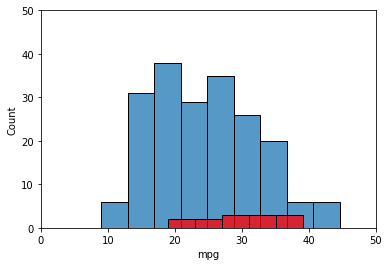

In [110]:
#toyotaと含まない車種, 燃費
sns.histplot(d, x='mpg')
sns.histplot(toyota, x='mpg', color='red')
plt.xlim(0,50)
plt.ylim(0,50)
plt.show()

## mpgが高い順

In [132]:
df_train.sort_values('mpg',ascending=False).head(15)

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
49,98,44.6,4,91.0,67.00,1850.0,13.8,80,3,honda civic 1500 gl
197,395,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)
40,83,43.1,4,90.0,48.00,1985.0,21.5,78,2,volkswagen rabbit custom diesel
123,251,41.5,4,98.0,76.00,2144.0,14.7,80,2,vw rabbit
145,288,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
194,384,40.8,4,85.0,65.00,2110.0,19.2,80,3,datsun 210
33,71,39.1,4,79.0,58.00,1755.0,16.9,81,3,toyota starlet
85,178,39.0,4,86.0,64.00,1875.0,16.4,81,1,plymouth champ
62,125,38.1,4,89.0,60.00,1968.0,18.8,80,3,toyota corolla tercel
29,62,38.0,6,262.0,85.00,3015.0,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [141]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            199 non-null    int64  
 1   mpg           199 non-null    float64
 2   cylinders     199 non-null    int64  
 3   displacement  199 non-null    float64
 4   horsepower    199 non-null    object 
 5   weight        199 non-null    float64
 6   acceleration  199 non-null    float64
 7   model year    199 non-null    int64  
 8   origin        199 non-null    int64  
 9   car name      199 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 15.7+ KB


### 'horsepower'に欠損値として'?'がある→補完する必要がある 
* diesel、ディーゼル車は燃費がいいのでは？

In [136]:
diesel=df_train[df_train['car name'].str.contains('diesel')]
diesel

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
18,40,28.1,4,141.0,80.00,3230.0,20.4,81,2,peugeot 505s turbo diesel
29,62,38.0,6,262.0,85.00,3015.0,17.0,82,1,oldsmobile cutlass ciera (diesel)
40,83,43.1,4,90.0,48.00,1985.0,21.5,78,2,volkswagen rabbit custom diesel
135,270,36.4,5,121.0,67.00,2950.0,19.9,80,2,audi 5000s (diesel)
197,395,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)


### ディーゼル車のmpgは全体の平均よりも高く、燃費が良い 
dieselか否かを判断する変数を用意するといいかも

In [142]:
#dieselの平均
print('mpgの平均',diesel['mpg'].mean())
print('displacementの平均',diesel['displacement'].mean())

mpgの平均 37.8
displacementの平均 140.8


In [143]:
#全体平均
print('mpgの平均', df_train['mpg'].mean())
print('displacementの平均',df_train['displacement'].mean())

mpgの平均 24.30703517587939
displacementの平均 183.31155778894473


## model yearとmpg 
* 80年代後半あたりが燃費が良い傾向にある 
* 時代背景、技術革新が関係している？

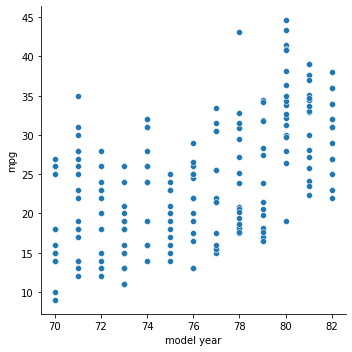

In [144]:
sns.relplot(data=df_train, x='model year', y='mpg')
plt.show()

In [145]:
df_train.columns

Index(['id', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

# 各変数の所感

mpg': 目的変数 

'cylinders', 4,6の燃費が良い, メーカー(car name)も一緒に確認  

'displacement', 少ない方が燃費が良い 

### 'horsepower', 欠損値(?)があるから補完必要。object型からfloat型に変換、分布確認 

'weight', 物理の公式上、理論上に比例関係をもつ 

'acceleration', あまり関係ない？ 

'model year', 80年代以降が燃費が良い、時代背景ある？ 

'origin', 1:アメリカ(燃費が良くない)、2:ヨーロッパ、3:日本（燃費が良い,honda,toyota...）

'car name' dieselがかなり燃費が良い（変数追加の案）、originを参照 

* 教師なし分類 
* lightGBM 
* シンプルな線形回帰

In [4]:
#馬力は文字列型
df_train['horsepower'].unique()

array(['84.00', '71.00', '108.0', '75.00', '62.00', '90.00', '105.0',
       '180.0', '113.0', '135.0', '120.0', '88.00', '165.0', '100.0',
       '69.00', '70.00', '60.00', '80.00', '132.0', '85.00', '130.0',
       '93.00', '?', '175.0', '68.00', '58.00', '110.0', '65.00', '67.00',
       '78.00', '48.00', '112.0', '86.00', '83.00', '81.00', '82.00',
       '92.00', '97.00', '76.00', '193.0', '148.0', '72.00', '170.0',
       '140.0', '220.0', '79.00', '198.0', '150.0', '64.00', '96.00',
       '138.0', '52.00', '145.0', '95.00', '160.0', '74.00', '54.00',
       '149.0', '139.0', '129.0', '63.00', '122.0', '200.0', '46.00',
       '153.0', '89.00', '155.0', '61.00', '215.0', '190.0', '115.0'],
      dtype=object)

In [5]:
#'欠損値：?'を文字列の0に一次補完
df_train['horsepower']=df_train['horsepower'].replace('?','0.00')

In [6]:
df_train['horsepower'].unique()

array(['84.00', '71.00', '108.0', '75.00', '62.00', '90.00', '105.0',
       '180.0', '113.0', '135.0', '120.0', '88.00', '165.0', '100.0',
       '69.00', '70.00', '60.00', '80.00', '132.0', '85.00', '130.0',
       '93.00', '0.00', '175.0', '68.00', '58.00', '110.0', '65.00',
       '67.00', '78.00', '48.00', '112.0', '86.00', '83.00', '81.00',
       '82.00', '92.00', '97.00', '76.00', '193.0', '148.0', '72.00',
       '170.0', '140.0', '220.0', '79.00', '198.0', '150.0', '64.00',
       '96.00', '138.0', '52.00', '145.0', '95.00', '160.0', '74.00',
       '54.00', '149.0', '139.0', '129.0', '63.00', '122.0', '200.0',
       '46.00', '153.0', '89.00', '155.0', '61.00', '215.0', '190.0',
       '115.0'], dtype=object)

In [7]:
#文字列型から浮動小数点数型に変換
df_train['horsepower']=df_train['horsepower'].astype('float')

In [8]:
df_train['horsepower'].unique()

array([ 84.,  71., 108.,  75.,  62.,  90., 105., 180., 113., 135., 120.,
        88., 165., 100.,  69.,  70.,  60.,  80., 132.,  85., 130.,  93.,
         0., 175.,  68.,  58., 110.,  65.,  67.,  78.,  48., 112.,  86.,
        83.,  81.,  82.,  92.,  97.,  76., 193., 148.,  72., 170., 140.,
       220.,  79., 198., 150.,  64.,  96., 138.,  52., 145.,  95., 160.,
        74.,  54., 149., 139., 129.,  63., 122., 200.,  46., 153.,  89.,
       155.,  61., 215., 190., 115.])

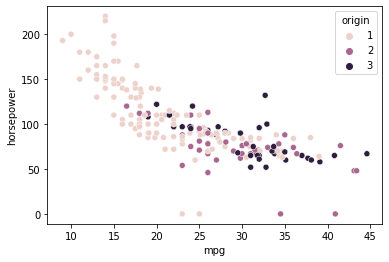

<Figure size 864x576 with 0 Axes>

In [9]:
#ばりきと燃費の散布図
#負の相関あり
#土地柄の問題なのか、１のアメリカは大きい車が多い(ばりきが高い)？

sns.scatterplot(data=df_train, x='mpg', y='horsepower',hue='origin')
plt.figure(figsize=(12,8))
plt.show()

In [10]:
df_train.describe()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,200.170854,24.307035,5.296482,183.311558,99.261307,2883.839196,15.647739,76.165829,1.582915
std,113.432759,7.797665,1.644562,98.400457,37.977027,819.766870,2.701885,3.802928,0.798932
min,0.000000,9.000000,3.000000,71.000000,0.000000,1613.000000,8.500000,70.000000,1.000000
25%,98.500000,18.000000,4.000000,98.000000,73.000000,2217.500000,14.000000,73.000000,1.000000
50%,202.000000,24.000000,4.000000,140.000000,90.000000,2702.000000,15.500000,76.000000,1.000000
75%,294.500000,30.500000,6.000000,250.000000,112.500000,3426.500000,17.150000,80.000000,2.000000
max,396.000000,44.600000,8.000000,454.000000,220.000000,5140.000000,23.700000,82.000000,3.000000


In [11]:
#旧式のアメリカの車が、重量も重く（高ばりき）燃費が低い
df_train[df_train['horsepower']==220.0]

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
69,143,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala


In [174]:
df_train.sort_values('horsepower',ascending=True).head(20)

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
113,234,34.5,4,100.0,0.0,2320.0,15.8,81,2,renault 18i
24,48,23.0,4,151.0,0.0,3035.0,20.5,82,1,amc concord dl
145,288,40.9,4,85.0,0.0,1835.0,17.3,80,2,renault lecar deluxe
175,349,25.0,4,98.0,0.0,2046.0,19.0,71,1,ford pinto
144,285,26.0,4,97.0,46.0,1835.0,20.5,70,2,volkswagen 1131 deluxe sedan
40,83,43.1,4,90.0,48.0,1985.0,21.5,78,2,volkswagen rabbit custom diesel
197,395,43.4,4,90.0,48.0,2335.0,23.7,80,2,vw dasher (diesel)
105,209,31.0,4,76.0,52.0,1649.0,16.5,74,3,toyota corona
172,343,32.8,4,78.0,52.0,1985.0,19.4,78,3,mazda glc deluxe
124,252,23.0,4,97.0,54.0,2254.0,23.5,72,2,volkswagen type 3


In [175]:
df_train.sort_values('horsepower',ascending=False).head(20)

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
69,143,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
170,339,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
141,278,10.0,8,307.0,200.0,4376.0,15.0,70,1,chevy c20
75,157,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
58,118,9.0,8,304.0,193.0,4732.0,18.5,70,1,hi 1200d
174,345,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl
163,325,12.0,8,383.0,180.0,4955.0,11.5,71,1,dodge monaco (sw)
7,19,11.0,8,350.0,180.0,3664.0,11.0,73,1,oldsmobile omega
26,53,13.0,8,400.0,175.0,5140.0,12.0,71,1,pontiac safari (sw)
56,115,13.0,8,360.0,175.0,3821.0,11.0,73,1,amc ambassador brougham


<AxesSubplot:>

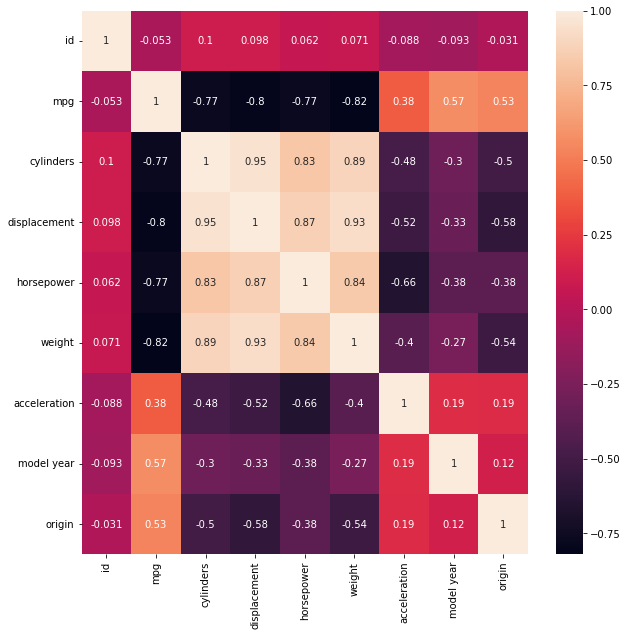

In [12]:
#相関係数ヒートマップ
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True)

### ばりきの欠損値の補完
* origin=1,cylinders=4 => 80.439024, df_train1 
* origin=2,cylinders=4 => 77.911765, df_train2
* origin=1, cylinders=6 => 120.000000, df_train3

の3パターンで条件抽出して,それぞれの平均値で補完する

* 上記のパターンの平均を補完する, df_train4

In [178]:
#欠損値を除いて、originとcylindersの組み合わせの平均を算出
df_train.query('horsepower > 0').groupby(['cylinders','origin']).horsepower.mean()

cylinders  origin
3          3         110.000000
4          1          80.439024
           2          77.911765
           3          75.666667
5          2          67.000000
6          1         103.628571
           2         120.000000
           3         115.800000
8          1         154.681818
Name: horsepower, dtype: float64

In [188]:
#origin=1,cylinders=4 => 80.439024 
df_train1=df_train['horsepower'].replace(0.00, 80.439024)

#origin=2,cylinders=4 => 77.911765
df_train2=df_train['horsepower'].replace(0.00, 77.911765)

#origin=1, cylinders=6 => 120.000000
df_train3=df_train['horsepower'].replace(0.00, 120.000000)

#3パターンの平均を補完する
df_train4=df_train['horsepower'].replace(0.00, (120.000000+80.439024+77.911765)/3)

df_train1=df_train

    

In [189]:
df_train1['horsepower'].unique()

array([ 84.,  71., 108.,  75.,  62.,  90., 105., 180., 113., 135., 120.,
        88., 165., 100.,  69.,  70.,  60.,  80., 132.,  85., 130.,  93.,
         0., 175.,  68.,  58., 110.,  65.,  67.,  78.,  48., 112.,  86.,
        83.,  81.,  82.,  92.,  97.,  76., 193., 148.,  72., 170., 140.,
       220.,  79., 198., 150.,  64.,  96., 138.,  52., 145.,  95., 160.,
        74.,  54., 149., 139., 129.,  63., 122., 200.,  46., 153.,  89.,
       155.,  61., 215., 190., 115.])

In [194]:
if (df_train['origin']==1) and (df_train['cylinders']==4):
    df_train1=df_train['horsepower'].replace(0.00, 80.439024)
df_train1.unique()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [13]:
df_train.horsepower[df_train['horsepower'] <= 0] = df_train[df_train['horsepower'] <= 0].apply(lambda x:df_train.query('horsepower > 0').groupby(['cylinders','origin']).horsepower.mean()[x.cylinders][x.origin],axis=1)

/var/folders/ks/17djw9_d5r3300_0z8cc33sh0000gn/T/ipykernel_18585/948197455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.horsepower[df_train['horsepower'] <= 0] = df_train[df_train['horsepower'] <= 0].apply(lambda x:df_train.query('horsepower > 0').groupby(['cylinders','origin']).horsepower.mean()[x.cylinders][x.origin],axis=1)


In [14]:
df_train['horsepower'].unique()

array([ 84.        ,  71.        , 108.        ,  75.        ,
        62.        ,  90.        , 105.        , 180.        ,
       113.        , 135.        , 120.        ,  88.        ,
       165.        , 100.        ,  69.        ,  70.        ,
        60.        ,  80.        , 132.        ,  85.        ,
       130.        ,  93.        ,  80.43902439, 175.        ,
        68.        ,  58.        , 110.        ,  65.        ,
        67.        ,  78.        ,  48.        , 112.        ,
        86.        ,  83.        ,  81.        ,  82.        ,
        92.        ,  97.        ,  76.        , 193.        ,
       148.        ,  72.        , 170.        , 140.        ,
       220.        ,  79.        , 198.        , 150.        ,
        64.        ,  96.        , 138.        ,  52.        ,
       145.        ,  77.91176471,  95.        , 160.        ,
        74.        ,  54.        , 149.        , 139.        ,
       129.        ,  63.        , 122.        , 200.  

In [214]:
df_train[df_train['car name']=='renault 18i']

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
113,234,34.5,4,100.0,77.911765,2320.0,15.8,81,2,renault 18i


In [208]:
(df_train['origin']==1) #&& (df_train['cylinders']==4)

0       True
1      False
2      False
3       True
4      False
       ...  
194    False
195     True
196     True
197    False
198    False
Name: origin, Length: 199, dtype: bool

In [186]:
#fordの平均
ford=df_train[df_train['car name'].str.contains('ford')]
ford_=ford.query('horsepower>0')
ford['horsepower'].mean()

109.1

In [191]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            199 non-null    int64  
 1   mpg           199 non-null    float64
 2   cylinders     199 non-null    int64  
 3   displacement  199 non-null    float64
 4   horsepower    199 non-null    float64
 5   weight        199 non-null    float64
 6   acceleration  199 non-null    float64
 7   model year    199 non-null    int64  
 8   origin        199 non-null    int64  
 9   car name      199 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 15.7+ KB


In [187]:
ford_.describe()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0
mean,210.578947,19.978947,6.105263,237.684211,114.842105,3333.631579,14.784211,75.736842,1.0
std,99.761558,5.735811,1.940640,102.734314,35.598476,854.010878,2.098482,3.461568,0.0
min,42.000000,13.000000,4.000000,98.000000,65.000000,2045.000000,10.000000,70.000000,1.0
25%,133.000000,15.500000,4.000000,140.000000,87.000000,2679.500000,13.550000,73.500000,1.0
50%,192.000000,18.100000,6.000000,250.000000,112.000000,3139.000000,14.700000,76.000000,1.0
75%,303.000000,24.050000,8.000000,302.000000,140.000000,4147.500000,16.000000,78.000000,1.0
max,355.000000,34.400000,8.000000,429.000000,198.000000,4657.000000,18.500000,82.000000,1.0


## データの前処理 
* horsepowerはoriginとcylindersの組み合わせの平均値で補完する 
* idは使わない 

In [4]:
#前処理をする関数
def preprocessing(df):
    
    #'欠損値：?'を文字列の0に一次補完
    df['horsepower']=df['horsepower'].replace('?','0.00')
    
    #文字列型から浮動小数点数型に変換
    df['horsepower']=df['horsepower'].astype('float')
    
    #馬力の欠損値補完
    df.horsepower[df['horsepower'] <= 0] = df[df['horsepower'] <= 0].apply(lambda x:df.query('horsepower > 0').groupby(['cylinders','origin']).horsepower.mean()[x.cylinders][x.origin],axis=1)   
    
    #カテゴリカル変数に変換
    df['car name']=df['car name'].astype('category')
    
    #id は削除
    df=df.drop('id', axis=1)
    return df 

## モデルの実装

In [215]:
df_train.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.0,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.0,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.0,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.0,2050.0,17.3,81,3,toyota tercel


In [216]:
#必要なライブラリをimport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import lightgbm as lgb

#階層的クラスタリング、デンドログラムの図示
from scipy.cluster.hierarchy import linkage, dendrogram

### 階層的クラスタリング 
* 各変数がクラスタリングするとしたときに、どれだけ説明できるか確認できる

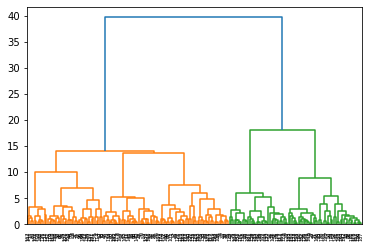

<Figure size 864x576 with 0 Axes>

In [227]:
#階層的クラスタリング
X=df_train.drop(['id','car name'], axis=1)

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

result = linkage(X_scaled, method='ward')

'''
single：最小距離法
complete：再長距離法
centroid：重心法
ward：ウォード法
'''

dendrogram(result)
plt.figure(figsize=(12,8))
plt.show()

In [228]:
from scipy.cluster.hierarchy import fcluster

cluster = fcluster(result, t=15, criterion='distance')
cluster

array([1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 3,
       1, 3, 1, 2, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1,
       1, 3, 3, 3, 1, 1, 1, 1, 2, 3, 1, 3, 1, 2, 1, 3, 2, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 2, 2, 3, 1,
       3, 3, 1, 1, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 3, 2, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1,
       1, 2, 3, 1, 1, 2, 3, 3, 3, 2, 1, 3, 1, 1, 1, 2, 3, 2, 1, 3, 3, 1,
       1], dtype=int32)

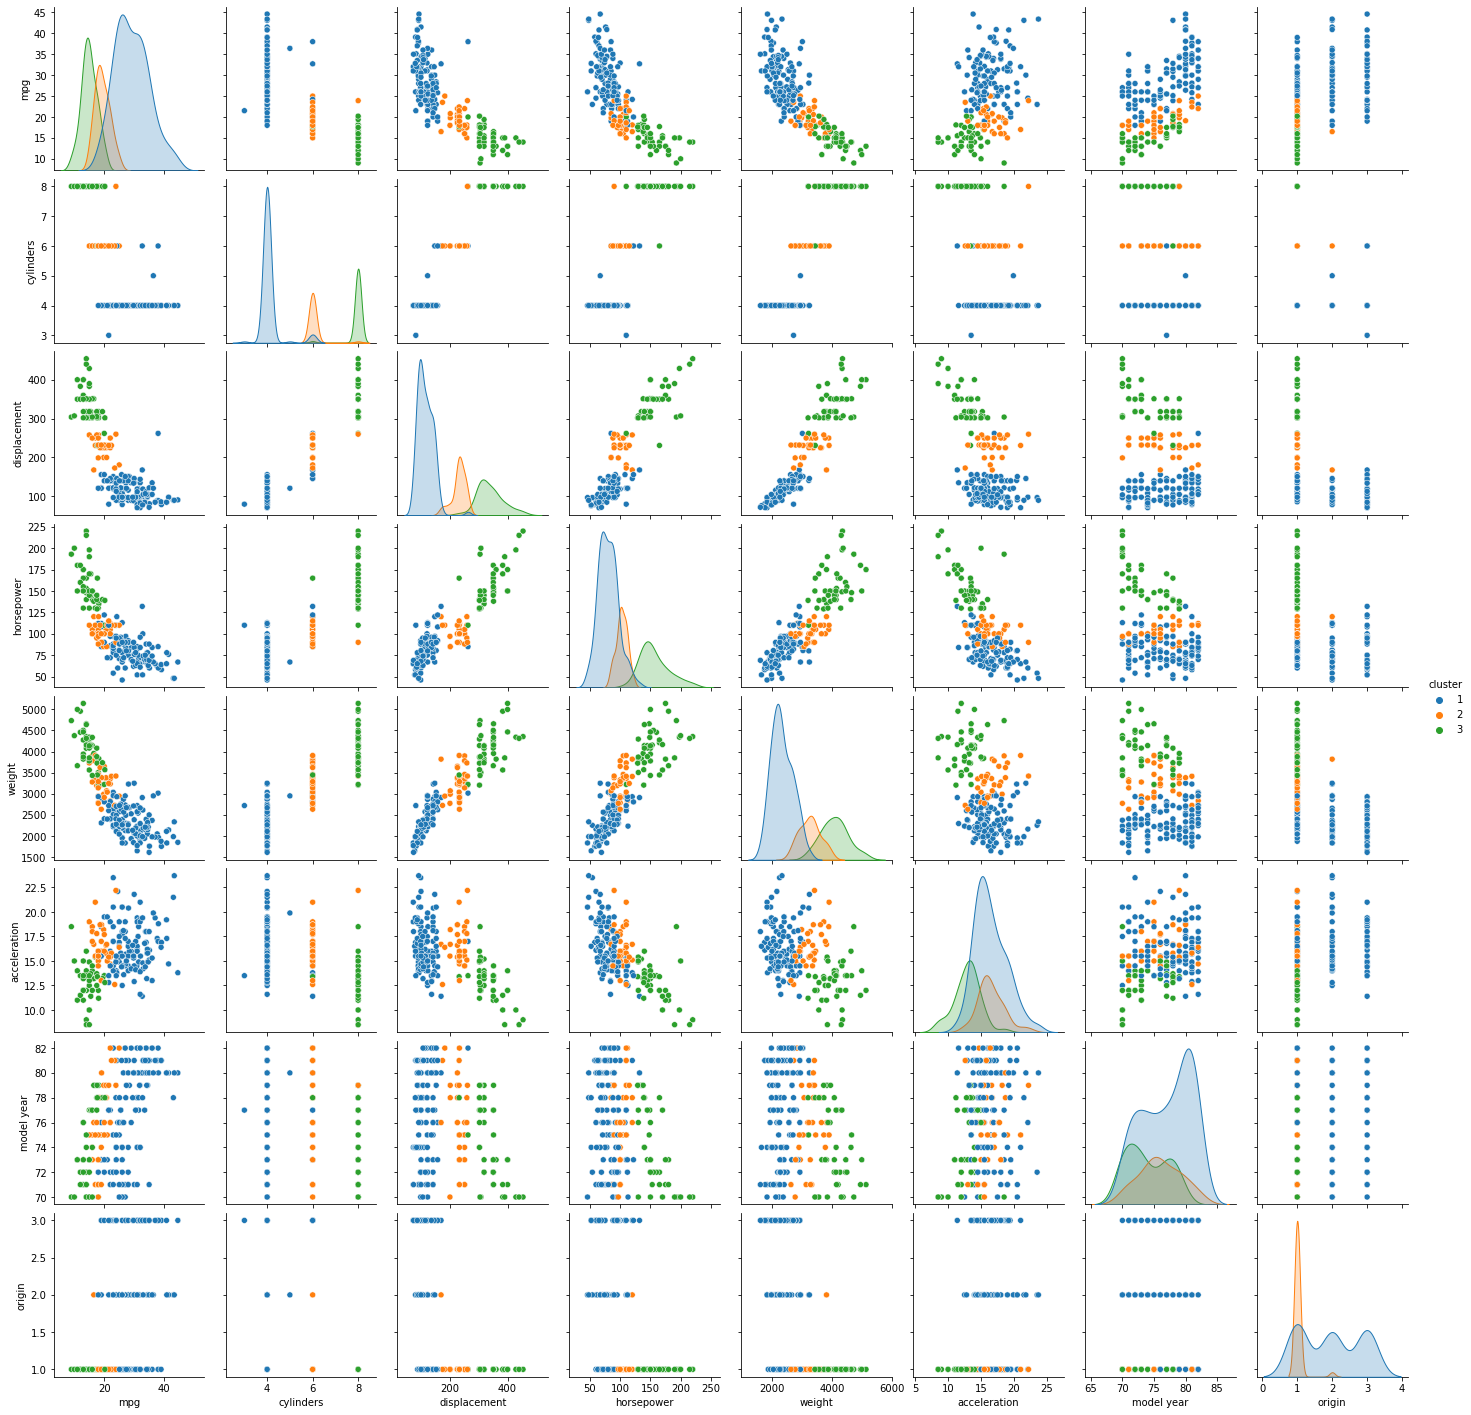

In [229]:
#車の性能は重さとシリンダーでほぼ説明できる
data=X.assign(cluster=cluster)
data['cluster']=data['cluster'].astype('str')
sns.pairplot(data, hue='cluster')
plt.show()

In [232]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            199 non-null    int64  
 1   mpg           199 non-null    float64
 2   cylinders     199 non-null    int64  
 3   displacement  199 non-null    float64
 4   horsepower    199 non-null    float64
 5   weight        199 non-null    float64
 6   acceleration  199 non-null    float64
 7   model year    199 non-null    int64  
 8   origin        199 non-null    int64  
 9   car name      199 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 15.7+ KB


## データの分割

In [9]:
df_train=preprocessing(df_train)

#car nameをカテゴリカル変数に変換
df_train['car name']=df_train['car name'].astype('category')

#説明変数
X=df_train.drop(['mpg'], axis=1)
#目的変数
y=df_train['mpg']


/var/folders/ks/17djw9_d5r3300_0z8cc33sh0000gn/T/ipykernel_45929/3089231402.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.horsepower[df['horsepower'] <= 0] = df[df['horsepower'] <= 0].apply(lambda x:df.query('horsepower > 0').groupby(['cylinders','origin']).horsepower.mean()[x.cylinders][x.origin],axis=1)


NameError: name 'train_test_split' is not defined

### lightGBM

In [10]:
#ハイパーパラメータ調整なし
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#訓練データを学習用と検証用に分割
train_X, val_X, train_y, val_y=train_test_split(X, y, test_size=0.2, random_state=0)

trains=lgb.Dataset(train_X, train_y)
vals=lgb.Dataset(val_X, val_y)

params={
    'objective': 'regression l1',
    'metrics': 'rmse'
}

lgb_reg1=lgb.train(params, trains, valid_sets=vals, num_boost_round=1000, early_stopping_rounds=100)


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] Unknown parameter: l1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: l1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 182
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 8
[LightGBM] [Warning] Unknown parameter: l1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 23.959119
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's rmse: 6.5539
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's rmse: 6.0911
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's rmse: 5.6409
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	valid_0's rmse: 2.73667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	valid_0's rmse: 2.73776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[76]	valid_0's rmse: 2.73972
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[77]	valid_0's rmse: 2.7413
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[78]	valid_0's rmse: 2.74406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[79]	valid_0's rmse: 2.74991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's rmse: 2.75097
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[81]	valid_0's rmse: 2.75228
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[82]	valid_0's rmse: 2.75083
[LightGBM] [Warning] No further splits with positive gain, best g

In [11]:
#ハイパーパラメータ調整あり
from sklearn.model_selection import GridSearchCV

lgb_reg2=lgb.LGBMRegressor(n_estimators=5000)

params={
    'max_depth':[i for i in range(1,3)],
    'num_leaves': [2**i for i in range(1,3)],
    'learning_rate': [0.1+0.01*i for i in range(1,3)]
}

grid=GridSearchCV(
    estimator=lgb_reg2,
    param_grid=params,
    cv=10,
    scoring='neg_mean_squared_error',
    verbose=10
)

grid.fit(train_X, train_y)

print('ベストスコア ', grid.best_score_)
print('最適なハイパーパラメータ　', grid.best_params_)

lgb_reg2.fit(train_X, train_y)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10; 1/8] START learning_rate=0.11, max_depth=1, num_leaves=2..............


KeyboardInterrupt: 

In [12]:
#ハイパーパラメータ調整なし
lgb_reg1=lgb.LGBMRegressor()
lgb_reg1.fit(train_X, train_y)

pred_train1=lgb_reg1.predict(train_X)
pred_val1=lgb_reg1.predict(val_X)

In [13]:
print('学習用：', np.sqrt(mean_squared_error(y_true=train_y, y_pred=pred_train1)))
print('検証用：', np.sqrt(mean_squared_error(y_true=val_y, y_pred=pred_val1)))

学習用： 1.9153542424234775
検証用： 2.777734894040161


In [265]:
?lgb.LGBMRegressor

In [14]:
lgb_reg2=lgb.LGBMRegressor(
    max_depth=1,
    num_leaves=2,
    learning_rate=0.11
)

lgb_reg2.fit(train_X, train_y)

pred_train=lgb_reg2.predict(train_X)
pred_val=lgb_reg2.predict(val_X)

In [15]:
#max_depth': 2, 'num_leaves': 4
print('学習用：', np.sqrt(mean_squared_error(y_true=train_y, y_pred=pred_train)))
print('検証用：', np.sqrt(mean_squared_error(y_true=val_y, y_pred=pred_val)))

学習用： 2.578214153283065
検証用： 2.673581452353156


In [257]:
#max_depth': 3, 'num_leaves': 4
print('学習用：', np.sqrt(mean_squared_error(y_true=train_y, y_pred=pred_train)))
print('検証用：', np.sqrt(mean_squared_error(y_true=val_y, y_pred=pred_val)))

学習用： 2.064077432175811
検証用： 2.81791899918167


In [263]:
#'learning_rate': 0.004, 'max_depth': 2, 'num_leaves': 4
print('学習用：', np.sqrt(mean_squared_error(y_true=train_y, y_pred=pred_train)))
print('検証用：', np.sqrt(mean_squared_error(y_true=val_y, y_pred=pred_val)))

学習用： 6.0268819099328255
検証用： 5.5341992186923115


In [268]:
#'learning_rate': 0.11, 'max_depth': 1, 'num_leaves': 2, 'n_estimators':1000
print('学習用：', np.sqrt(mean_squared_error(y_true=train_y, y_pred=pred_train)))
print('検証用：', np.sqrt(mean_squared_error(y_true=val_y, y_pred=pred_val)))

学習用： 2.578214153283065
検証用： 2.673581452353156


In [261]:
#'learning_rate': 0.11, 'max_depth': 1, 'num_leaves': 2, 'n_estimators':5000
print('学習用：', np.sqrt(mean_squared_error(y_true=train_y, y_pred=pred_train)))
print('検証用：', np.sqrt(mean_squared_error(y_true=val_y, y_pred=pred_val)))

学習用： 7.272087853461999
検証用： 7.501477296546942


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

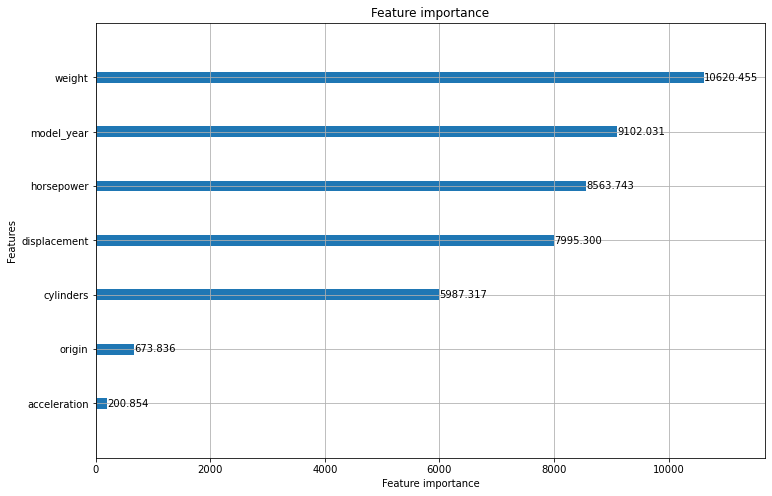

In [277]:
#各特徴量の重要度を確認
lgb.plot_importance(lgb_reg2, figsize=(12,8), max_num_features=50, importance_type='gain')

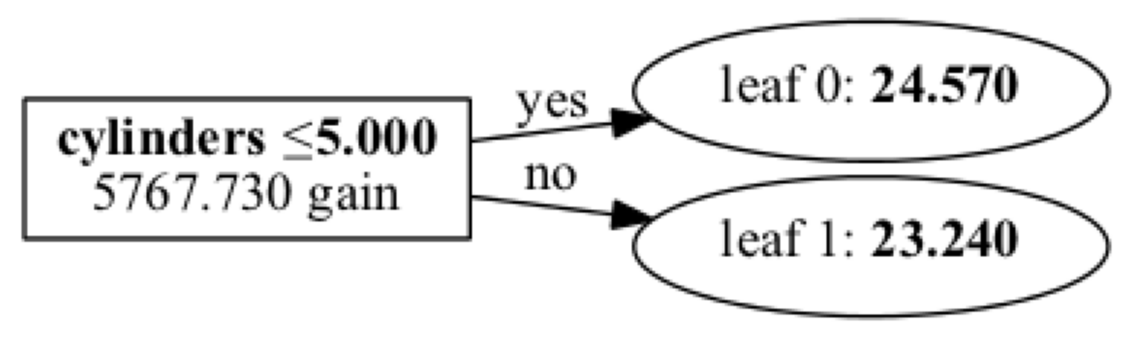

In [280]:
#決定木表示
ax = lgb.plot_tree(lgb_reg2, tree_index=0, figsize=(20, 20), show_info=['split_gain'])
plt.show()

In [281]:
?lgb.plot_tree

In [287]:
#ランダムフォレスト用
train_X_c=train_X.drop('car name', axis=1)
val_X_c=val_X.drop('car name', axis=1)

### ランダムフォレスト

In [346]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=0, max_features='sqrt')
rfr.fit(train_X_c,train_y)

RandomForestRegressor(max_features='sqrt', random_state=0)

In [347]:
pred_train_r=rfr.predict(train_X_c)
pred_val_r=rfr.predict(val_X_c)

In [349]:
#デフォルト
print('学習用：', np.sqrt(mean_squared_error(y_true=train_y, y_pred=pred_train_r)))
print('検証用：', np.sqrt(mean_squared_error(y_true=val_y, y_pred=pred_val_r)))

学習用： 1.2391874239589886
検証用： 2.7346749395494876


In [ ]:
#auto
# 学習用： 1.2059641332005022
# 検証用： 2.6425937211383816

#sqrt
# 学習用： 1.2391874239589886
# 検証用： 2.7346749395494876


In [293]:
feature_names=train_X_c.columns
np.c_[feature_names,rfr.feature_importances_]

array([['cylinders', 0.03903734376280877],
       ['displacement', 0.18920841933771684],
       ['horsepower', 0.22456128655959467],
       ['weight', 0.3794663118654029],
       ['acceleration', 0.02813047371321401],
       ['model year', 0.1327083457947279],
       ['origin', 0.006887818966534883]], dtype=object)

In [301]:
# import graphviz
# from sklearn.tree import export_graphviz

# dot_data=export_graphviz(rfr)

# graph_tree=graphviz.Source(dot_data)
# graph_tree

In [304]:
import time

#パラメータ調整あり
rfr2=RandomForestRegressor(random_state=0)

params={
    'n_estimators': [10*i for i in range(1,11)],
    'max_depth': [i for i in range(1,3)],
    'max_leaf_nodes': [2**i for i in range(1,3)],
    'max_features': ('sqrt', 'log2', 'auto', None)
    #'learning_rate': [0.1+0.01*i for i in range(1,3)]
}

grid=GridSearchCV(
    estimator=rfr2,
    param_grid=params,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=10
)

s=time.time()
grid.fit(train_X_c, train_y)
e=time.time()

print('計算時間：', e-s)
print('ベストスコア ', grid.best_score_)
print('最適なハイパーパラメータ　', grid.best_params_)


Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5; 1/160] START max_depth=1, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 1/5; 1/160] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=-20.137 total time=   0.1s
[CV 2/5; 1/160] START max_depth=1, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 2/5; 1/160] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=-27.521 total time=   0.1s
[CV 3/5; 1/160] START max_depth=1, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 3/5; 1/160] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=-29.502 total time=   0.1s
[CV 4/5; 1/160] START max_depth=1, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 4/5; 1/160] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=-8.774 total time=   0.1s
[CV 5/5; 1/160] START max_depth=1, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 5/5; 1/160

[CV 5/5; 8/160] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, n_estimators=80;, score=-26.718 total time=   0.6s
[CV 1/5; 9/160] START max_depth=1, max_features=sqrt, max_leaf_nodes=2, n_estimators=90
[CV 1/5; 9/160] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, n_estimators=90;, score=-20.720 total time=   0.7s
[CV 2/5; 9/160] START max_depth=1, max_features=sqrt, max_leaf_nodes=2, n_estimators=90
[CV 2/5; 9/160] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, n_estimators=90;, score=-24.955 total time=   0.9s
[CV 3/5; 9/160] START max_depth=1, max_features=sqrt, max_leaf_nodes=2, n_estimators=90
[CV 3/5; 9/160] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, n_estimators=90;, score=-30.703 total time=   0.8s
[CV 4/5; 9/160] START max_depth=1, max_features=sqrt, max_leaf_nodes=2, n_estimators=90
[CV 4/5; 9/160] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, n_estimators=90;, score=-10.386 total time=   0.9s
[CV 5/5; 9/160] START max_depth=1, max_feat

[CV 4/5; 16/160] END max_depth=1, max_features=sqrt, max_leaf_nodes=4, n_estimators=60;, score=-10.244 total time=   0.7s
[CV 5/5; 16/160] START max_depth=1, max_features=sqrt, max_leaf_nodes=4, n_estimators=60
[CV 5/5; 16/160] END max_depth=1, max_features=sqrt, max_leaf_nodes=4, n_estimators=60;, score=-26.551 total time=   0.6s
[CV 1/5; 17/160] START max_depth=1, max_features=sqrt, max_leaf_nodes=4, n_estimators=70
[CV 1/5; 17/160] END max_depth=1, max_features=sqrt, max_leaf_nodes=4, n_estimators=70;, score=-20.669 total time=   0.6s
[CV 2/5; 17/160] START max_depth=1, max_features=sqrt, max_leaf_nodes=4, n_estimators=70
[CV 2/5; 17/160] END max_depth=1, max_features=sqrt, max_leaf_nodes=4, n_estimators=70;, score=-24.732 total time=   0.4s
[CV 3/5; 17/160] START max_depth=1, max_features=sqrt, max_leaf_nodes=4, n_estimators=70
[CV 3/5; 17/160] END max_depth=1, max_features=sqrt, max_leaf_nodes=4, n_estimators=70;, score=-30.684 total time=   0.4s
[CV 4/5; 17/160] START max_depth=1

[CV 3/5; 24/160] END max_depth=1, max_features=log2, max_leaf_nodes=2, n_estimators=40;, score=-30.702 total time=   0.3s
[CV 4/5; 24/160] START max_depth=1, max_features=log2, max_leaf_nodes=2, n_estimators=40
[CV 4/5; 24/160] END max_depth=1, max_features=log2, max_leaf_nodes=2, n_estimators=40;, score=-10.787 total time=   0.3s
[CV 5/5; 24/160] START max_depth=1, max_features=log2, max_leaf_nodes=2, n_estimators=40
[CV 5/5; 24/160] END max_depth=1, max_features=log2, max_leaf_nodes=2, n_estimators=40;, score=-27.517 total time=   0.2s
[CV 1/5; 25/160] START max_depth=1, max_features=log2, max_leaf_nodes=2, n_estimators=50
[CV 1/5; 25/160] END max_depth=1, max_features=log2, max_leaf_nodes=2, n_estimators=50;, score=-20.147 total time=   0.4s
[CV 2/5; 25/160] START max_depth=1, max_features=log2, max_leaf_nodes=2, n_estimators=50
[CV 2/5; 25/160] END max_depth=1, max_features=log2, max_leaf_nodes=2, n_estimators=50;, score=-26.121 total time=   0.3s
[CV 3/5; 25/160] START max_depth=1

[CV 3/5; 32/160] END max_depth=1, max_features=log2, max_leaf_nodes=4, n_estimators=20;, score=-30.572 total time=   0.2s
[CV 4/5; 32/160] START max_depth=1, max_features=log2, max_leaf_nodes=4, n_estimators=20
[CV 4/5; 32/160] END max_depth=1, max_features=log2, max_leaf_nodes=4, n_estimators=20;, score=-10.111 total time=   0.2s
[CV 5/5; 32/160] START max_depth=1, max_features=log2, max_leaf_nodes=4, n_estimators=20
[CV 5/5; 32/160] END max_depth=1, max_features=log2, max_leaf_nodes=4, n_estimators=20;, score=-27.736 total time=   0.1s
[CV 1/5; 33/160] START max_depth=1, max_features=log2, max_leaf_nodes=4, n_estimators=30
[CV 1/5; 33/160] END max_depth=1, max_features=log2, max_leaf_nodes=4, n_estimators=30;, score=-20.078 total time=  -0.1s
[CV 2/5; 33/160] START max_depth=1, max_features=log2, max_leaf_nodes=4, n_estimators=30
[CV 2/5; 33/160] END max_depth=1, max_features=log2, max_leaf_nodes=4, n_estimators=30;, score=-27.943 total time=   0.3s
[CV 3/5; 33/160] START max_depth=1

[CV 2/5; 40/160] END max_depth=1, max_features=log2, max_leaf_nodes=4, n_estimators=100;, score=-24.727 total time=   0.8s
[CV 3/5; 40/160] START max_depth=1, max_features=log2, max_leaf_nodes=4, n_estimators=100
[CV 3/5; 40/160] END max_depth=1, max_features=log2, max_leaf_nodes=4, n_estimators=100;, score=-30.773 total time=   0.9s
[CV 4/5; 40/160] START max_depth=1, max_features=log2, max_leaf_nodes=4, n_estimators=100
[CV 4/5; 40/160] END max_depth=1, max_features=log2, max_leaf_nodes=4, n_estimators=100;, score=-10.319 total time=   0.8s
[CV 5/5; 40/160] START max_depth=1, max_features=log2, max_leaf_nodes=4, n_estimators=100
[CV 5/5; 40/160] END max_depth=1, max_features=log2, max_leaf_nodes=4, n_estimators=100;, score=-26.488 total time=   0.7s
[CV 1/5; 41/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=10
[CV 1/5; 41/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=-21.529 total time=   0.1s
[CV 2/5; 41/160] START max_

/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

[CV 3/5; 41/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=-30.117 total time=   0.1s
[CV 4/5; 41/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=10
[CV 4/5; 41/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=-12.007 total time=   0.1s
[CV 5/5; 41/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=10
[CV 5/5; 41/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=-31.501 total time=   0.1s
[CV 1/5; 42/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

[CV 1/5; 42/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=-21.957 total time=   0.3s
[CV 2/5; 42/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=20
[CV 2/5; 42/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=-31.114 total time=   0.1s
[CV 3/5; 42/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 42/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=-30.934 total time=   0.2s
[CV 4/5; 42/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=20
[CV 4/5; 42/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=-10.563 total time=   0.1s
[CV 5/5; 42/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 42/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=-29.796 total time=   0.1s
[CV 1/5; 43/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=30


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 43/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=30;, score=-21.958 total time=   0.2s
[CV 2/5; 43/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=30
[CV 2/5; 43/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=30;, score=-30.735 total time=   0.3s
[CV 3/5; 43/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=30


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 43/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=30;, score=-30.713 total time=   0.3s
[CV 4/5; 43/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=30
[CV 4/5; 43/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=30;, score=-11.806 total time=   0.2s
[CV 5/5; 43/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=30


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 43/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=30;, score=-29.482 total time=   0.2s
[CV 1/5; 44/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 44/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=40;, score=-21.749 total time=   0.3s
[CV 2/5; 44/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 44/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=40;, score=-30.759 total time=   0.5s
[CV 3/5; 44/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 44/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=40;, score=-30.823 total time=   0.4s
[CV 4/5; 44/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 44/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=40;, score=-12.773 total time=   0.3s
[CV 5/5; 44/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 44/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=40;, score=-29.727 total time=   0.3s
[CV 1/5; 45/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 45/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=50;, score=-22.104 total time=   0.6s
[CV 2/5; 45/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 45/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=50;, score=-30.418 total time=   0.3s
[CV 3/5; 45/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 45/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=50;, score=-30.772 total time=   0.4s
[CV 4/5; 45/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 45/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=50;, score=-12.578 total time=   0.3s
[CV 5/5; 45/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 45/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=50;, score=-29.688 total time=   0.4s
[CV 1/5; 46/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 46/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=60;, score=-21.778 total time=   0.4s
[CV 2/5; 46/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 46/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=60;, score=-29.997 total time=   0.3s
[CV 3/5; 46/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 46/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=60;, score=-30.758 total time=   0.3s
[CV 4/5; 46/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 46/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=60;, score=-12.598 total time=   0.6s
[CV 5/5; 46/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 46/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=60;, score=-29.995 total time=   0.5s
[CV 1/5; 47/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 47/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=70;, score=-22.008 total time=   0.4s
[CV 2/5; 47/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 47/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=70;, score=-30.027 total time=   0.5s
[CV 3/5; 47/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 47/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=70;, score=-30.855 total time=   0.5s
[CV 4/5; 47/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 47/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=70;, score=-12.617 total time=   0.5s
[CV 5/5; 47/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 47/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=70;, score=-29.893 total time=   0.6s
[CV 1/5; 48/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 48/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=80;, score=-21.862 total time=   0.6s
[CV 2/5; 48/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 48/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=80;, score=-30.214 total time=   0.5s
[CV 3/5; 48/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 48/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=80;, score=-30.919 total time=   0.5s
[CV 4/5; 48/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 48/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=80;, score=-12.749 total time=   0.6s
[CV 5/5; 48/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 48/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=80;, score=-30.108 total time=   0.5s
[CV 1/5; 49/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 49/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=90;, score=-21.998 total time=   0.7s
[CV 2/5; 49/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 49/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=90;, score=-30.191 total time=   0.5s
[CV 3/5; 49/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 49/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=90;, score=-30.977 total time=   0.7s
[CV 4/5; 49/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 49/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=90;, score=-13.112 total time=   1.2s
[CV 5/5; 49/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 49/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=90;, score=-30.388 total time=   1.2s
[CV 1/5; 50/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 50/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=100;, score=-22.068 total time=   1.2s
[CV 2/5; 50/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 50/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=100;, score=-30.025 total time=   1.4s
[CV 3/5; 50/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 50/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=100;, score=-31.018 total time=   1.0s
[CV 4/5; 50/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 50/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=100;, score=-12.480 total time=   0.6s
[CV 5/5; 50/160] START max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 50/160] END max_depth=1, max_features=auto, max_leaf_nodes=2, n_estimators=100;, score=-30.407 total time=   0.7s
[CV 1/5; 51/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 1/5; 51/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=-21.529 total time=   0.1s
[CV 2/5; 51/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 2/5; 51/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=-33.140 total time=   0.1s
[CV 3/5; 51/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 3/5; 51/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=-30.117 total time=   0.1s
[CV 4/5; 51/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=10


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

[CV 4/5; 51/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=-12.007 total time=   0.1s
[CV 5/5; 51/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 5/5; 51/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=-31.501 total time=   0.1s
[CV 1/5; 52/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=20
[CV 1/5; 52/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=-21.957 total time=   0.1s
[CV 2/5; 52/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

[CV 2/5; 52/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=-31.114 total time=   0.3s
[CV 3/5; 52/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=20
[CV 3/5; 52/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=-30.934 total time=   0.1s
[CV 4/5; 52/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 52/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=-10.563 total time=   0.2s
[CV 5/5; 52/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=20
[CV 5/5; 52/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=-29.796 total time=   0.1s
[CV 1/5; 53/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=30


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 53/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=30;, score=-21.958 total time=   0.2s
[CV 2/5; 53/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=30
[CV 2/5; 53/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=30;, score=-30.735 total time=   0.2s
[CV 3/5; 53/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=30


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 53/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=30;, score=-30.713 total time=   0.3s
[CV 4/5; 53/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=30
[CV 4/5; 53/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=30;, score=-11.806 total time=   0.2s
[CV 5/5; 53/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=30


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 53/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=30;, score=-29.482 total time=   0.2s
[CV 1/5; 54/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 54/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=40;, score=-21.749 total time=   0.3s
[CV 2/5; 54/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 54/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=40;, score=-30.759 total time=   0.3s
[CV 3/5; 54/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 54/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=40;, score=-30.823 total time=   0.3s
[CV 4/5; 54/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 54/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=40;, score=-12.773 total time=   0.4s
[CV 5/5; 54/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 54/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=40;, score=-29.727 total time=   0.4s
[CV 1/5; 55/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 55/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=50;, score=-22.104 total time=   0.9s
[CV 2/5; 55/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 55/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=50;, score=-30.418 total time=   0.4s
[CV 3/5; 55/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 55/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=50;, score=-30.772 total time=   0.6s
[CV 4/5; 55/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 55/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=50;, score=-12.578 total time=   0.4s
[CV 5/5; 55/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 55/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=50;, score=-29.688 total time=   0.5s
[CV 1/5; 56/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 56/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=60;, score=-21.778 total time=   0.3s
[CV 2/5; 56/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 56/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=60;, score=-29.997 total time=   0.9s
[CV 3/5; 56/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 56/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=60;, score=-30.758 total time=   0.4s
[CV 4/5; 56/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 56/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=60;, score=-12.598 total time=   0.3s
[CV 5/5; 56/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 56/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=60;, score=-29.995 total time=   0.5s
[CV 1/5; 57/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 57/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=70;, score=-22.008 total time=   0.6s
[CV 2/5; 57/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 57/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=70;, score=-30.027 total time=   0.5s
[CV 3/5; 57/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 57/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=70;, score=-30.855 total time=   1.1s
[CV 4/5; 57/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 57/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=70;, score=-12.617 total time=   0.5s
[CV 5/5; 57/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 57/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=70;, score=-29.893 total time=   0.4s
[CV 1/5; 58/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 58/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=80;, score=-21.862 total time=   1.1s
[CV 2/5; 58/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 58/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=80;, score=-30.214 total time=   1.1s
[CV 3/5; 58/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 58/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=80;, score=-30.919 total time=   0.7s
[CV 4/5; 58/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 58/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=80;, score=-12.749 total time=   0.5s
[CV 5/5; 58/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 58/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=80;, score=-30.108 total time=   0.4s
[CV 1/5; 59/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 59/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=90;, score=-21.998 total time=   0.6s
[CV 2/5; 59/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 59/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=90;, score=-30.191 total time=   0.6s
[CV 3/5; 59/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 59/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=90;, score=-30.977 total time=   0.4s
[CV 4/5; 59/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 59/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=90;, score=-13.112 total time=   0.6s
[CV 5/5; 59/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 59/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=90;, score=-30.388 total time=   0.5s
[CV 1/5; 60/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 60/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=100;, score=-22.068 total time=   0.7s
[CV 2/5; 60/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 60/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=100;, score=-30.025 total time=   0.5s
[CV 3/5; 60/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 60/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=100;, score=-31.018 total time=   0.7s
[CV 4/5; 60/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 60/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=100;, score=-12.480 total time=   0.5s
[CV 5/5; 60/160] START max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 60/160] END max_depth=1, max_features=auto, max_leaf_nodes=4, n_estimators=100;, score=-30.407 total time=   0.7s
[CV 1/5; 61/160] START max_depth=1, max_features=None, max_leaf_nodes=2, n_estimators=10
[CV 1/5; 61/160] END max_depth=1, max_features=None, max_leaf_nodes=2, n_estimators=10;, score=-21.529 total time=   0.1s
[CV 2/5; 61/160] START max_depth=1, max_features=None, max_leaf_nodes=2, n_estimators=10
[CV 2/5; 61/160] END max_depth=1, max_features=None, max_leaf_nodes=2, n_estimators=10;, score=-33.140 total time=   0.1s
[CV 3/5; 61/160] START max_depth=1, max_features=None, max_leaf_nodes=2, n_estimators=10
[CV 3/5; 61/160] END max_depth=1, max_features=None, max_leaf_nodes=2, n_estimators=10;, score=-30.117 total time=   0.1s
[CV 4/5; 61/160] START max_depth=1, max_features=None, max_leaf_nodes=2, n_estimators=10
[CV 4/5; 61/160] END max_depth=1, max_features=None, max_leaf_nodes=2, n_estimators=10;, score=-12.007 total time=   0.1s
[CV 5/5; 61/160] START max_depth=

[CV 4/5; 68/160] END max_depth=1, max_features=None, max_leaf_nodes=2, n_estimators=80;, score=-12.749 total time=   0.4s
[CV 5/5; 68/160] START max_depth=1, max_features=None, max_leaf_nodes=2, n_estimators=80
[CV 5/5; 68/160] END max_depth=1, max_features=None, max_leaf_nodes=2, n_estimators=80;, score=-30.108 total time=   0.5s
[CV 1/5; 69/160] START max_depth=1, max_features=None, max_leaf_nodes=2, n_estimators=90
[CV 1/5; 69/160] END max_depth=1, max_features=None, max_leaf_nodes=2, n_estimators=90;, score=-21.998 total time=   0.5s
[CV 2/5; 69/160] START max_depth=1, max_features=None, max_leaf_nodes=2, n_estimators=90
[CV 2/5; 69/160] END max_depth=1, max_features=None, max_leaf_nodes=2, n_estimators=90;, score=-30.191 total time=   0.5s
[CV 3/5; 69/160] START max_depth=1, max_features=None, max_leaf_nodes=2, n_estimators=90
[CV 3/5; 69/160] END max_depth=1, max_features=None, max_leaf_nodes=2, n_estimators=90;, score=-30.977 total time=   0.6s
[CV 4/5; 69/160] START max_depth=1

[CV 3/5; 76/160] END max_depth=1, max_features=None, max_leaf_nodes=4, n_estimators=60;, score=-30.758 total time=   0.4s
[CV 4/5; 76/160] START max_depth=1, max_features=None, max_leaf_nodes=4, n_estimators=60
[CV 4/5; 76/160] END max_depth=1, max_features=None, max_leaf_nodes=4, n_estimators=60;, score=-12.598 total time=   0.3s
[CV 5/5; 76/160] START max_depth=1, max_features=None, max_leaf_nodes=4, n_estimators=60
[CV 5/5; 76/160] END max_depth=1, max_features=None, max_leaf_nodes=4, n_estimators=60;, score=-29.995 total time=   0.4s
[CV 1/5; 77/160] START max_depth=1, max_features=None, max_leaf_nodes=4, n_estimators=70
[CV 1/5; 77/160] END max_depth=1, max_features=None, max_leaf_nodes=4, n_estimators=70;, score=-22.008 total time=   0.4s
[CV 2/5; 77/160] START max_depth=1, max_features=None, max_leaf_nodes=4, n_estimators=70
[CV 2/5; 77/160] END max_depth=1, max_features=None, max_leaf_nodes=4, n_estimators=70;, score=-30.027 total time=   0.3s
[CV 3/5; 77/160] START max_depth=1

[CV 2/5; 84/160] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=40;, score=-26.541 total time=   1.0s
[CV 3/5; 84/160] START max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=40
[CV 3/5; 84/160] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=40;, score=-30.702 total time=   0.5s
[CV 4/5; 84/160] START max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=40
[CV 4/5; 84/160] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=40;, score=-10.787 total time=   0.6s
[CV 5/5; 84/160] START max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=40
[CV 5/5; 84/160] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=40;, score=-27.517 total time=   0.2s
[CV 1/5; 85/160] START max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=50
[CV 1/5; 85/160] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=50;, score=-20.147 total time=   0.3s
[CV 2/5; 85/160] START max_depth=2

[CV 1/5; 92/160] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, n_estimators=20;, score=-13.520 total time=   0.3s
[CV 2/5; 92/160] START max_depth=2, max_features=sqrt, max_leaf_nodes=4, n_estimators=20
[CV 2/5; 92/160] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, n_estimators=20;, score=-20.781 total time=   0.1s
[CV 3/5; 92/160] START max_depth=2, max_features=sqrt, max_leaf_nodes=4, n_estimators=20
[CV 3/5; 92/160] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, n_estimators=20;, score=-21.168 total time=   0.1s
[CV 4/5; 92/160] START max_depth=2, max_features=sqrt, max_leaf_nodes=4, n_estimators=20
[CV 4/5; 92/160] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, n_estimators=20;, score=-11.434 total time=   0.1s
[CV 5/5; 92/160] START max_depth=2, max_features=sqrt, max_leaf_nodes=4, n_estimators=20
[CV 5/5; 92/160] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, n_estimators=20;, score=-20.113 total time=   0.1s
[CV 1/5; 93/160] START max_depth=2

[CV 5/5; 99/160] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, n_estimators=90;, score=-17.750 total time=   1.1s
[CV 1/5; 100/160] START max_depth=2, max_features=sqrt, max_leaf_nodes=4, n_estimators=100
[CV 1/5; 100/160] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, n_estimators=100;, score=-13.606 total time=   1.1s
[CV 2/5; 100/160] START max_depth=2, max_features=sqrt, max_leaf_nodes=4, n_estimators=100
[CV 2/5; 100/160] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, n_estimators=100;, score=-18.760 total time=   0.8s
[CV 3/5; 100/160] START max_depth=2, max_features=sqrt, max_leaf_nodes=4, n_estimators=100
[CV 3/5; 100/160] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, n_estimators=100;, score=-20.097 total time=   0.6s
[CV 4/5; 100/160] START max_depth=2, max_features=sqrt, max_leaf_nodes=4, n_estimators=100
[CV 4/5; 100/160] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, n_estimators=100;, score=-10.895 total time=   1.0s
[CV 5/5; 100/160] 

[CV 4/5; 107/160] END max_depth=2, max_features=log2, max_leaf_nodes=2, n_estimators=70;, score=-10.522 total time=   1.4s
[CV 5/5; 107/160] START max_depth=2, max_features=log2, max_leaf_nodes=2, n_estimators=70
[CV 5/5; 107/160] END max_depth=2, max_features=log2, max_leaf_nodes=2, n_estimators=70;, score=-26.740 total time=   1.0s
[CV 1/5; 108/160] START max_depth=2, max_features=log2, max_leaf_nodes=2, n_estimators=80
[CV 1/5; 108/160] END max_depth=2, max_features=log2, max_leaf_nodes=2, n_estimators=80;, score=-20.632 total time=   1.4s
[CV 2/5; 108/160] START max_depth=2, max_features=log2, max_leaf_nodes=2, n_estimators=80
[CV 2/5; 108/160] END max_depth=2, max_features=log2, max_leaf_nodes=2, n_estimators=80;, score=-24.751 total time=   1.0s
[CV 3/5; 108/160] START max_depth=2, max_features=log2, max_leaf_nodes=2, n_estimators=80
[CV 3/5; 108/160] END max_depth=2, max_features=log2, max_leaf_nodes=2, n_estimators=80;, score=-30.749 total time=   1.8s
[CV 4/5; 108/160] START m

[CV 3/5; 115/160] END max_depth=2, max_features=log2, max_leaf_nodes=4, n_estimators=50;, score=-20.132 total time=   0.4s
[CV 4/5; 115/160] START max_depth=2, max_features=log2, max_leaf_nodes=4, n_estimators=50
[CV 4/5; 115/160] END max_depth=2, max_features=log2, max_leaf_nodes=4, n_estimators=50;, score=-11.539 total time=   0.3s
[CV 5/5; 115/160] START max_depth=2, max_features=log2, max_leaf_nodes=4, n_estimators=50
[CV 5/5; 115/160] END max_depth=2, max_features=log2, max_leaf_nodes=4, n_estimators=50;, score=-18.444 total time=   0.5s
[CV 1/5; 116/160] START max_depth=2, max_features=log2, max_leaf_nodes=4, n_estimators=60
[CV 1/5; 116/160] END max_depth=2, max_features=log2, max_leaf_nodes=4, n_estimators=60;, score=-13.740 total time=   0.9s
[CV 2/5; 116/160] START max_depth=2, max_features=log2, max_leaf_nodes=4, n_estimators=60
[CV 2/5; 116/160] END max_depth=2, max_features=log2, max_leaf_nodes=4, n_estimators=60;, score=-18.579 total time=   0.6s
[CV 3/5; 116/160] START m

/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 121/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=-21.529 total time=   0.4s
[CV 2/5; 121/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10
[CV 2/5; 121/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=-33.140 total time=   0.1s
[CV 3/5; 121/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 121/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=-30.117 total time=   0.2s
[CV 4/5; 121/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 121/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=-12.007 total time=   0.7s
[CV 5/5; 121/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 121/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=-31.501 total time=   0.4s
[CV 1/5; 122/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 122/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=-21.957 total time=   0.4s
[CV 2/5; 122/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 122/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=-31.114 total time=   0.5s
[CV 3/5; 122/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 122/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=-30.934 total time=   0.5s
[CV 4/5; 122/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20
[CV 4/5; 122/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=-10.563 total time=   0.2s
[CV 5/5; 122/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 122/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=-29.796 total time=   0.9s
[CV 1/5; 123/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=30


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 123/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=30;, score=-21.958 total time=   1.0s
[CV 2/5; 123/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=30


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 123/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=30;, score=-30.735 total time=   0.3s
[CV 3/5; 123/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=30


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 123/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=30;, score=-30.713 total time=   0.3s
[CV 4/5; 123/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=30


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 123/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=30;, score=-11.806 total time=   0.7s
[CV 5/5; 123/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=30


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 123/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=30;, score=-29.482 total time=   0.5s
[CV 1/5; 124/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 124/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=40;, score=-21.749 total time=   0.4s
[CV 2/5; 124/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 124/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=40;, score=-30.759 total time=   0.6s
[CV 3/5; 124/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 124/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=40;, score=-30.823 total time=   0.4s
[CV 4/5; 124/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 124/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=40;, score=-12.773 total time=   0.6s
[CV 5/5; 124/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 124/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=40;, score=-29.727 total time=   0.4s
[CV 1/5; 125/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 125/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=50;, score=-22.104 total time=   0.7s
[CV 2/5; 125/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 125/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=50;, score=-30.418 total time=   0.5s
[CV 3/5; 125/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 125/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=50;, score=-30.772 total time=   0.6s
[CV 4/5; 125/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 125/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=50;, score=-12.578 total time=   0.4s
[CV 5/5; 125/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 125/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=50;, score=-29.688 total time=   0.6s
[CV 1/5; 126/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 126/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=60;, score=-21.778 total time=   0.4s
[CV 2/5; 126/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 126/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=60;, score=-29.997 total time=   0.4s
[CV 3/5; 126/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 126/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=60;, score=-30.758 total time=   0.5s
[CV 4/5; 126/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 126/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=60;, score=-12.598 total time=   0.4s
[CV 5/5; 126/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 126/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=60;, score=-29.995 total time=   1.1s
[CV 1/5; 127/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 127/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=70;, score=-22.008 total time=   0.9s
[CV 2/5; 127/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 127/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=70;, score=-30.027 total time=   1.0s
[CV 3/5; 127/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 127/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=70;, score=-30.855 total time=   0.7s
[CV 4/5; 127/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 127/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=70;, score=-12.617 total time=   0.8s
[CV 5/5; 127/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 127/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=70;, score=-29.893 total time=   0.6s
[CV 1/5; 128/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 128/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=80;, score=-21.862 total time=   0.6s
[CV 2/5; 128/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 128/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=80;, score=-30.214 total time=   0.5s
[CV 3/5; 128/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 128/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=80;, score=-30.919 total time=   0.7s
[CV 4/5; 128/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 128/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=80;, score=-12.749 total time=   0.6s
[CV 5/5; 128/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 128/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=80;, score=-30.108 total time=   0.6s
[CV 1/5; 129/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 129/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=90;, score=-21.998 total time=   0.7s
[CV 2/5; 129/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 129/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=90;, score=-30.191 total time=   0.5s
[CV 3/5; 129/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 129/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=90;, score=-30.977 total time=   0.8s
[CV 4/5; 129/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 129/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=90;, score=-13.112 total time=   0.7s
[CV 5/5; 129/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 129/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=90;, score=-30.388 total time=   0.8s
[CV 1/5; 130/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 130/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=100;, score=-22.068 total time=   0.7s
[CV 2/5; 130/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 130/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=100;, score=-30.025 total time=   0.8s
[CV 3/5; 130/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 130/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=100;, score=-31.018 total time=   0.9s
[CV 4/5; 130/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 130/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=100;, score=-12.480 total time=   0.6s
[CV 5/5; 130/160] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 130/160] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=100;, score=-30.407 total time=   0.9s
[CV 1/5; 131/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 1/5; 131/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=-22.632 total time=   0.1s
[CV 2/5; 131/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 131/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=-19.721 total time=   0.2s
[CV 3/5; 131/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 3/5; 131/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=-17.700 total time=   0.1s
[CV 4/5; 131/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 4/5; 131/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=-8.351 total time=   0.1s
[CV 5/5; 131/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

[CV 5/5; 131/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=-18.163 total time=   0.3s
[CV 1/5; 132/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 132/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=-21.533 total time=   0.3s
[CV 2/5; 132/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 132/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=-18.200 total time=   0.4s
[CV 3/5; 132/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 132/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=-18.033 total time=   0.3s
[CV 4/5; 132/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 132/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=-8.840 total time=   0.3s
[CV 5/5; 132/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 132/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=-16.019 total time=   0.3s
[CV 1/5; 133/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=30


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 133/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=30;, score=-21.098 total time=   0.4s
[CV 2/5; 133/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=30


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 133/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=30;, score=-17.312 total time=   0.4s
[CV 3/5; 133/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=30


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 133/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=30;, score=-17.159 total time=   0.6s
[CV 4/5; 133/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=30


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 133/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=30;, score=-8.391 total time=   0.5s
[CV 5/5; 133/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=30


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 133/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=30;, score=-15.654 total time=   0.5s
[CV 1/5; 134/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 134/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=40;, score=-21.347 total time=   0.5s
[CV 2/5; 134/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 134/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=40;, score=-17.426 total time=   0.7s
[CV 3/5; 134/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 134/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=40;, score=-16.938 total time=   0.4s
[CV 4/5; 134/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 134/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=40;, score=-7.707 total time=   0.4s
[CV 5/5; 134/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=40


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 134/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=40;, score=-16.128 total time=   0.3s
[CV 1/5; 135/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 135/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=50;, score=-21.171 total time=   0.4s
[CV 2/5; 135/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 135/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=50;, score=-17.220 total time=   0.4s
[CV 3/5; 135/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 135/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=50;, score=-16.871 total time=   0.4s
[CV 4/5; 135/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 135/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=50;, score=-7.303 total time=   0.6s
[CV 5/5; 135/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=50


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 135/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=50;, score=-16.443 total time=   0.4s
[CV 1/5; 136/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 136/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=60;, score=-20.939 total time=   0.6s
[CV 2/5; 136/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 136/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=60;, score=-17.129 total time=   0.6s
[CV 3/5; 136/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 136/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=60;, score=-16.777 total time=   0.5s
[CV 4/5; 136/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 136/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=60;, score=-6.961 total time=   0.8s
[CV 5/5; 136/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=60


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 136/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=60;, score=-16.681 total time=   0.9s
[CV 1/5; 137/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 137/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=70;, score=-21.601 total time=   1.1s
[CV 2/5; 137/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 137/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=70;, score=-17.175 total time=   1.1s
[CV 3/5; 137/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 137/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=70;, score=-16.754 total time=   0.8s
[CV 4/5; 137/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 137/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=70;, score=-7.100 total time=   0.5s
[CV 5/5; 137/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=70


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 137/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=70;, score=-16.937 total time=   0.7s
[CV 1/5; 138/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 138/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=80;, score=-21.377 total time=   0.7s
[CV 2/5; 138/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 138/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=80;, score=-17.418 total time=   0.6s
[CV 3/5; 138/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 138/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=80;, score=-17.019 total time=   0.5s
[CV 4/5; 138/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 138/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=80;, score=-6.932 total time=   0.7s
[CV 5/5; 138/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=80


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 138/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=80;, score=-17.391 total time=   0.7s
[CV 1/5; 139/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 139/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=90;, score=-21.240 total time=   0.7s
[CV 2/5; 139/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 139/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=90;, score=-17.309 total time=   0.9s
[CV 3/5; 139/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 139/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=90;, score=-17.046 total time=   1.0s
[CV 4/5; 139/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 139/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=90;, score=-7.216 total time=   0.7s
[CV 5/5; 139/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=90


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 139/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=90;, score=-17.418 total time=   0.8s
[CV 1/5; 140/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 140/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=100;, score=-21.631 total time=   1.2s
[CV 2/5; 140/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 140/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=100;, score=-17.059 total time=   0.9s
[CV 3/5; 140/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 140/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=100;, score=-17.107 total time=   0.8s
[CV 4/5; 140/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 140/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=100;, score=-6.817 total time=   1.4s
[CV 5/5; 140/160] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=100


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 140/160] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=100;, score=-17.460 total time=   1.2s
[CV 1/5; 141/160] START max_depth=2, max_features=None, max_leaf_nodes=2, n_estimators=10
[CV 1/5; 141/160] END max_depth=2, max_features=None, max_leaf_nodes=2, n_estimators=10;, score=-21.529 total time=   0.1s
[CV 2/5; 141/160] START max_depth=2, max_features=None, max_leaf_nodes=2, n_estimators=10
[CV 2/5; 141/160] END max_depth=2, max_features=None, max_leaf_nodes=2, n_estimators=10;, score=-33.140 total time=   0.3s
[CV 3/5; 141/160] START max_depth=2, max_features=None, max_leaf_nodes=2, n_estimators=10
[CV 3/5; 141/160] END max_depth=2, max_features=None, max_leaf_nodes=2, n_estimators=10;, score=-30.117 total time=   0.2s
[CV 4/5; 141/160] START max_depth=2, max_features=None, max_leaf_nodes=2, n_estimators=10
[CV 4/5; 141/160] END max_depth=2, max_features=None, max_leaf_nodes=2, n_estimators=10;, score=-12.007 total time=   0.1s
[CV 5/5; 141/160] START 

[CV 4/5; 148/160] END max_depth=2, max_features=None, max_leaf_nodes=2, n_estimators=80;, score=-12.749 total time=   0.7s
[CV 5/5; 148/160] START max_depth=2, max_features=None, max_leaf_nodes=2, n_estimators=80
[CV 5/5; 148/160] END max_depth=2, max_features=None, max_leaf_nodes=2, n_estimators=80;, score=-30.108 total time=   0.9s
[CV 1/5; 149/160] START max_depth=2, max_features=None, max_leaf_nodes=2, n_estimators=90
[CV 1/5; 149/160] END max_depth=2, max_features=None, max_leaf_nodes=2, n_estimators=90;, score=-21.998 total time=   0.7s
[CV 2/5; 149/160] START max_depth=2, max_features=None, max_leaf_nodes=2, n_estimators=90
[CV 2/5; 149/160] END max_depth=2, max_features=None, max_leaf_nodes=2, n_estimators=90;, score=-30.191 total time=   1.0s
[CV 3/5; 149/160] START max_depth=2, max_features=None, max_leaf_nodes=2, n_estimators=90
[CV 3/5; 149/160] END max_depth=2, max_features=None, max_leaf_nodes=2, n_estimators=90;, score=-30.977 total time=   0.8s
[CV 4/5; 149/160] START m

[CV 3/5; 156/160] END max_depth=2, max_features=None, max_leaf_nodes=4, n_estimators=60;, score=-16.777 total time=   0.4s
[CV 4/5; 156/160] START max_depth=2, max_features=None, max_leaf_nodes=4, n_estimators=60
[CV 4/5; 156/160] END max_depth=2, max_features=None, max_leaf_nodes=4, n_estimators=60;, score=-6.961 total time=   0.7s
[CV 5/5; 156/160] START max_depth=2, max_features=None, max_leaf_nodes=4, n_estimators=60
[CV 5/5; 156/160] END max_depth=2, max_features=None, max_leaf_nodes=4, n_estimators=60;, score=-16.681 total time=   0.4s
[CV 1/5; 157/160] START max_depth=2, max_features=None, max_leaf_nodes=4, n_estimators=70
[CV 1/5; 157/160] END max_depth=2, max_features=None, max_leaf_nodes=4, n_estimators=70;, score=-21.601 total time=   0.5s
[CV 2/5; 157/160] START max_depth=2, max_features=None, max_leaf_nodes=4, n_estimators=70
[CV 2/5; 157/160] END max_depth=2, max_features=None, max_leaf_nodes=4, n_estimators=70;, score=-17.175 total time=   0.5s
[CV 3/5; 157/160] START ma

/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


計算時間： 391.58142709732056
ベストスコア  -15.697396272150424
最適なハイパーパラメータ　 {'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': 4, 'n_estimators': 60}


## グリッドサーチの結果の確認

In [306]:
grid.cv_results_['rank_test_score']

{'mean_fit_time': array([0.08645144, 0.18711638, 0.21187634, 0.25797057, 0.31526389,
        0.33399181, 0.42296548, 0.5097012 , 0.71086884, 0.67234921,
        0.09972882, 0.23422608, 0.19213786, 0.25066757, 0.31350236,
        0.47265792, 0.3960361 , 0.4552496 , 0.56444726, 0.73237476,
        0.11955514, 0.20963178, 0.26270056, 0.27681651, 0.32683382,
        0.35044999, 0.39336882, 0.75724077, 1.05190849, 0.7688098 ,
        0.08030958, 0.14207196, 0.19295993, 0.26496873, 0.57378697,
        0.66842813, 0.48592973, 0.62015843, 0.64299364, 0.75347581,
        0.06545601, 0.15214849, 0.21083369, 0.34401836, 0.38677483,
        0.39206448, 0.47856469, 0.49981856, 0.79231157, 0.90206304,
        0.058043  , 0.14180436, 0.18915439, 0.29428344, 0.52364407,
        0.46771684, 0.54313397, 0.65385056, 0.54516101, 0.56957622,
        0.05211649, 0.13625598, 0.17001033, 0.24903469, 0.31467361,
        0.49369278, 0.44947858, 0.42554955, 0.47318377, 0.58748889,
        0.0582273 , 0.22077899,

In [326]:
grid.cv_results_['params'][135]

{'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': 4,
 'n_estimators': 60}

In [327]:
grid.cv_results_['params'][155]

{'max_depth': 2, 'max_features': None, 'max_leaf_nodes': 4, 'n_estimators': 60}

In [317]:
grid.cv_results_['params']['rank_test_score'==1]

{'max_depth': 1,
 'max_features': 'sqrt',
 'max_leaf_nodes': 2,
 'n_estimators': 10}

In [323]:
grid.cv_results_['rank_test_score'].tolist().index(1)

135

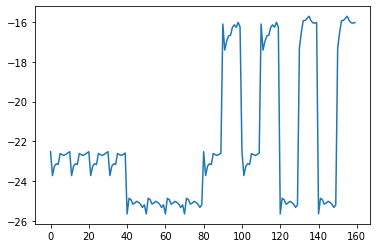

In [335]:
#テストスコアの折れ線グラフ
r=grid.cv_results_['mean_test_score'].tolist()
x=np.arange(len(r))

plt.plot(x,r)
plt.show()

In [339]:
scores = pd.DataFrame(np.c_[
    grid.cv_results_['params'],
    grid.cv_results_['rank_test_score'],
    grid.cv_results_['mean_test_score'],
])
scores.sort_values(1).values


array([[{'max_depth': 2, 'max_features': None, 'max_leaf_nodes': 4, 'n_estimators': 60},
        1, -15.697396272150424],
       [{'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': 4, 'n_estimators': 60},
        1, -15.697396272150424],
       [{'max_depth': 2, 'max_features': None, 'max_leaf_nodes': 4, 'n_estimators': 50},
        3, -15.8016078577094],
       [{'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': 4, 'n_estimators': 50},
        3, -15.8016078577094],
       [{'max_depth': 2, 'max_features': None, 'max_leaf_nodes': 4, 'n_estimators': 40},
        5, -15.9093021314471],
       [{'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': 4, 'n_estimators': 40},
        5, -15.9093021314471],
       [{'max_depth': 2, 'max_features': None, 'max_leaf_nodes': 4, 'n_estimators': 70},
        7, -15.913631290894651],
       [{'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': 4, 'n_estimators': 70},
        7, -15.913631290894651],
       [{'max_depth': 2,

In [297]:
#rfr1
rfr1=RandomForestRegressor(
    n_estimators=500,
    max_depth=2,
    max_leaf_nodes=4
)

rfr1.fit(train_X_c, train_y)

RandomForestRegressor(max_depth=2, max_leaf_nodes=4, n_estimators=500)

In [298]:
pred_train_r=rfr1.predict(train_X_c)
pred_val_r=rfr1.predict(val_X_c)

#max_depth=2, max_leaf_nodes=4, n_estimators=500
print('学習用：', np.sqrt(mean_squared_error(y_true=train_y, y_pred=pred_train_r)))
print('検証用：', np.sqrt(mean_squared_error(y_true=val_y, y_pred=pred_val_r)))

feature_names=train_X_c.columns
np.c_[feature_names,rfr.feature_importances_]

学習用： 3.2902190432222977
検証用： 3.20304886712754


array([['cylinders', 0.03903734376280877],
       ['displacement', 0.18920841933771684],
       ['horsepower', 0.22456128655959467],
       ['weight', 0.3794663118654029],
       ['acceleration', 0.02813047371321401],
       ['model year', 0.1327083457947279],
       ['origin', 0.006887818966534883]], dtype=object)

In [342]:
#rfr2
rfr2=RandomForestRegressor(
    n_estimators=60,
    max_depth=2,
    max_leaf_nodes=4,
    max_features='auto'
)

rfr2.fit(train_X_c, train_y)

pred_train_r=rfr2.predict(train_X_c)
pred_val_r=rfr2.predict(val_X_c)

#max_depth=2, max_leaf_nodes=4, n_estimators=60, max_features='auto'(n_features)
print('学習用：', np.sqrt(mean_squared_error(y_true=train_y, y_pred=pred_train_r)))
print('検証用：', np.sqrt(mean_squared_error(y_true=val_y, y_pred=pred_val_r)))

feature_names=train_X_c.columns
np.c_[feature_names,rfr.feature_importances_]

/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


学習用： 3.3682469918023235
検証用： 3.1471227712395695


array([['cylinders', 0.03903734376280877],
       ['displacement', 0.18920841933771684],
       ['horsepower', 0.22456128655959467],
       ['weight', 0.3794663118654029],
       ['acceleration', 0.02813047371321401],
       ['model year', 0.1327083457947279],
       ['origin', 0.006887818966534883]], dtype=object)

In [ ]:
#Noneは''auto''と同じ、全特徴量をそのまま使用する
#決定係数は説明変数を多くすると、高くなる性質がある

#None
# 学習用： 3.286611664902904
# 検証用： 3.1679428220758648


#sqrt
# 学習用： 3.4894378894017932
# 検証用： 3.4776649307842824


#auto
# 学習用： 3.3682469918023235
# 検証用： 3.1471227712395695

In [86]:
df_train.columns

Index(['id', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

## Optuna

In [16]:
import optuna.integration.lightgbm as lgb_tune
import time

dtrain=lgb.Dataset(train_X, label=train_y)
dval=lgb.Dataset(val_X, label=val_y)

params = {
    "objective": "regression_l2",
    "metric": "mean_squared_error",
    'n_estimators': 100000, 
    'verbosity':-1,
    'n_jobs':-1
}

s=time.time()
lgb_tuned1 = lgb_tune.train(params, dtrain, 
                    valid_sets=[dtrain, dval],
                    verbose_eval=False,
                    early_stopping_rounds=100,
                    )
e=time.time()
print(e-s)

[I 2022-09-14 15:42:39,630] A new study created in memory with name: no-name-e954f32d-3f82-419a-b0b6-531cf1dad281
feature_fraction, val_score: inf:   0%|                   | 0/7 [00:00<?, ?it/s]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGB

feature_fraction, val_score: 7.144826:  57%|###4  | 4/7 [00:58<00:42, 14.18s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is d

num_leaves, val_score: 6.825275:   5%|5          | 1/20 [00:19<06:10, 19.50s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is d

num_leaves, val_score: 6.825275:  25%|##7        | 5/20 [01:32<04:47, 19.14s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is d

num_leaves, val_score: 6.825275:  45%|####9      | 9/20 [02:31<02:53, 15.80s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is d

num_leaves, val_score: 6.825275:  65%|######5   | 13/20 [03:36<01:51, 15.91s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is d

num_leaves, val_score: 6.823294:  85%|########5 | 17/20 [04:20<00:31, 10.49s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is d

bagging, val_score: 6.627890:  10%|#4            | 1/10 [00:11<01:46, 11.81s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is d

bagging, val_score: 6.227438:  50%|#######       | 5/10 [01:08<01:06, 13.30s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is d

/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
bagging, val_score: 6.227438:  90%|############6 | 9/10 [02:09<00:15, 15.22s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instea

feature_fraction_stage2, val_score: 6.227438:  50%|5| 3/6 [00:47<00:47, 15.77s/i[I 2022-09-14 15:52:24,394] Trial 39 finished with value: 6.856754298498508 and parameters: {'feature_fraction': 0.552}. Best is trial 37 with value: 6.227437764859627.
feature_fraction_stage2, val_score: 6.227438:  50%|5| 3/6 [00:47<00:47, 15.77s/i/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site

regularization_factors, val_score: 6.227418:   5%| | 1/20 [00:13<04:17, 13.56s/i[I 2022-09-14 15:53:22,149] Trial 43 finished with value: 6.227418266364208 and parameters: {'lambda_l1': 5.055533919247475e-06, 'lambda_l2': 0.000879690817400332}. Best is trial 43 with value: 6.227418266364208.
regularization_factors, val_score: 6.227418:   5%| | 1/20 [00:13<04:17, 13.56s/i/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users

regularization_factors, val_score: 6.227403:  25%|2| 5/20 [01:14<03:44, 14.98s/i[I 2022-09-14 15:54:23,146] Trial 47 finished with value: 6.272465504454145 and parameters: {'lambda_l1': 1.830063582099433, 'lambda_l2': 0.00019700756155701675}. Best is trial 45 with value: 6.227403337949895.
regularization_factors, val_score: 6.227403:  25%|2| 5/20 [01:14<03:44, 14.98s/i/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/S

regularization_factors, val_score: 6.227260:  45%|4| 9/20 [02:17<02:53, 15.77s/i[I 2022-09-14 15:55:25,864] Trial 51 finished with value: 6.268744012037767 and parameters: {'lambda_l1': 0.34184066006830793, 'lambda_l2': 9.453391202299587}. Best is trial 50 with value: 6.227260114278975.
regularization_factors, val_score: 6.227260:  45%|4| 9/20 [02:17<02:53, 15.77s/i/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shot

regularization_factors, val_score: 6.226647:  60%|6| 12/20 [02:42<01:18,  9.82s/[I 2022-09-14 15:55:50,834] Trial 55 finished with value: 6.251786910275407 and parameters: {'lambda_l1': 5.568095717173509e-05, 'lambda_l2': 0.10354993967871065}. Best is trial 54 with value: 6.226647061816348.
regularization_factors, val_score: 6.226647:  65%|6| 13/20 [02:42<01:08,  9.82s//Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/

regularization_factors, val_score: 6.226497:  85%|8| 17/20 [02:42<00:06,  2.22s/[I 2022-09-14 15:55:51,398] Trial 59 finished with value: 6.227433027768938 and parameters: {'lambda_l1': 0.00022915682318023288, 'lambda_l2': 1.4481021339969518e-05}. Best is trial 56 with value: 6.226497020860101.
regularization_factors, val_score: 6.226497:  85%|8| 17/20 [02:42<00:06,  2.22s//Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Us

min_data_in_leaf, val_score: 6.218099:  20%|#2    | 1/5 [00:00<00:00, 11.91it/s]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is d

min_data_in_leaf, val_score: 5.706481: 100%|######| 5/5 [00:00<00:00,  6.59it/s]

792.8091330528259


In [27]:
lgb_tuned1.params

{'objective': 'regression_l2',
 'metric': 'l2',
 'verbosity': -1,
 'n_jobs': -1,
 'feature_pre_filter': False,
 'lambda_l1': 0.020598502667132295,
 'lambda_l2': 0.9430074594421136,
 'num_leaves': 3,
 'feature_fraction': 0.6799999999999999,
 'bagging_fraction': 0.7239855675688142,
 'bagging_freq': 1,
 'min_child_samples': 10,
 'num_iterations': 100000,
 'early_stopping_round': 100,
 'categorical_column': [7]}

In [18]:
print('学習用：　',mean_squared_error(y_pred=lgb_tuned1.predict(train_X),y_true=train_y, squared=False))
print('検証用：　',mean_squared_error(y_pred=lgb_tuned1.predict(val_X),y_true=val_y,squared=False))

学習用：　 2.5335811198316316
検証用：　 2.388824079060878


## 重回帰モデル

In [237]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split,KFold

feature_names=[
    'cylinders',       
    'displacement',
    'horsepower',
    'weight',
    'acceleration', 
    'model year', 
    'origin', 
#     'car name'
]

lr_X=df_train[feature_names].values
lr_y=df_train['mpg'].values

train_X_lr, val_X_lr, train_y_lr, val_y_lr=train_test_split(lr_X,lr_y,test_size=0.2,random_state=1111)

ss=StandardScaler()
ss.fit(train_X_lr)
train_X=ss.transform(train_X_lr)
val_X=ss.transform(val_X_lr)


model_lr=LinearRegression()
model_lr.fit(train_X_lr, train_y_lr)


LinearRegression()

In [238]:
np.sqrt(mean_squared_error(y_pred=model_lr.predict(val_X_lr), y_true=val_y_lr))

3.1750005206476737

In [239]:
mean_squared_error(y_pred=model_lr.predict(val_X_lr), y_true=val_y_lr, squared=False)

3.1750005206476737

In [240]:
r2_score(y_pred=model_lr.predict(val_X_lr), y_true=val_y_lr)

0.8568021378035414

In [241]:
r2_score(y_pred=model_lr.predict(train_X_lr), y_true=train_y_lr)

0.8143892263755891

## リッジ回帰

In [242]:
from sklearn.linear_model import Lasso, Ridge
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import LassoCV, RidgeCV

RIDGE=Ridge(alpha=1.019)
RIDGE.fit(train_X,train_y_lr)

Ridge(alpha=1.019)

In [243]:
mean_squared_error(y_pred=RIDGE.predict(val_X), y_true=val_y_lr, squared=False)

3.127968102705911

In [244]:
mean_squared_error(y_pred=RIDGE.predict(train_X), y_true=train_y_lr, squared=False)

3.2850728880245033

In [245]:
r2_score(y_pred=RIDGE.predict(val_X), y_true=val_y_lr)

0.8610131973671189

In [246]:
r2_score(y_pred=RIDGE.predict(train_X), y_true=train_y_lr)

0.8139180660615715

/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1911: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha**-1)


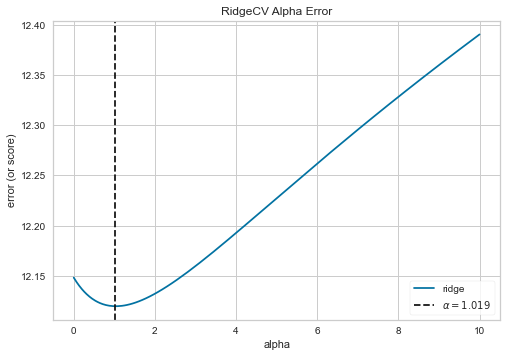

In [196]:
alphas = np.logspace(-10, 1, 500)    # alphaの探索空間 = [10**(-10), 10**1]
#↑ 10^-10～10^1を500分割したもの
RIDGE_CV = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(RIDGE_CV)
visualizer.fit(train_X, train_y_lr)
visualizer.show()
plt.show()

## ラッソ回帰

In [247]:
LASSO=Lasso(alpha=0.211)
LASSO.fit(train_X,train_y_lr)

Lasso(alpha=0.211)

In [248]:
mean_squared_error(y_pred=LASSO.predict(val_X), y_true=val_y_lr,squared=False)

3.096034757280761

In [249]:
mean_squared_error(y_pred=LASSO.predict(train_X), y_true=train_y_lr, squared=False)

3.347115542346114

In [250]:
r2_score(y_pred=LASSO.predict(val_X), y_true=val_y_lr)

0.8638365370680283

In [251]:
r2_score(y_pred=LASSO.predict(train_X), y_true=train_y_lr)

0.806822918741751

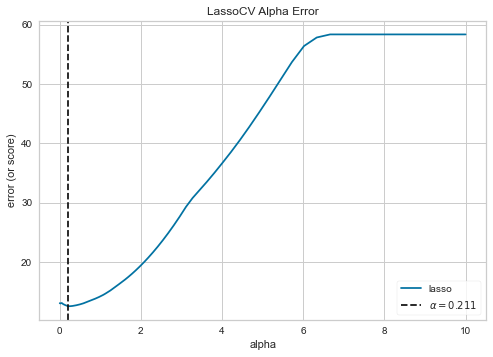

In [252]:
alphas = np.logspace(-10, 1, 500)    # alphaの探索空間 = [10**(-10), 10**1]
#↑ 10^-10～10^1を500分割したもの
LASSO_CV = LassoCV(alphas=alphas)
visualizer = AlphaSelection(LASSO_CV)
visualizer.fit(train_X, train_y_lr)
visualizer.show()
plt.show()

## ニューラルネットワーク

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

2022-09-14 15:31:39.379020: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## テストデータ 
* lightGBMパラメータチューニングあり 
* lightGBMパラメータチューニングなし 
* ランダムフォレストパラメータチューニングあり 
* ランダムフォレストパラメータチューニングなし 
* 重回帰分析 
* リッジ回帰 
* ラッソ回帰

In [19]:
df_test=pd.read_csv('test.csv')
df_test.head()

,id,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,1,6,145.0,76.00,3160.0,19.6,81,2,volvo diesel
1,2,6,250.0,98.00,3525.0,19.0,77,1,ford granada
2,4,4,119.0,92.00,2434.0,15.0,80,3,datsun 510 hatchback
3,5,6,258.0,110.0,2962.0,13.5,71,1,amc hornet sportabout (sw)
4,6,4,97.0,88.00,2100.0,16.5,72,3,toyota corolla 1600 (sw)


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            199 non-null    int64  
 1   cylinders     199 non-null    int64  
 2   displacement  199 non-null    float64
 3   horsepower    199 non-null    object 
 4   weight        199 non-null    float64
 5   acceleration  199 non-null    float64
 6   model year    199 non-null    int64  
 7   origin        199 non-null    int64  
 8   car name      199 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 14.1+ KB


In [277]:
df_test[df_test['horsepower']=='?']

,id,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
70,138,6,200.0,?,2875.0,17.0,74,1,ford maverick
112,221,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra


In [21]:
df_test=preprocessing(df_test)

/var/folders/ks/17djw9_d5r3300_0z8cc33sh0000gn/T/ipykernel_45929/3089231402.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.horsepower[df['horsepower'] <= 0] = df[df['horsepower'] <= 0].apply(lambda x:df.query('horsepower > 0').groupby(['cylinders','origin']).horsepower.mean()[x.cylinders][x.origin],axis=1)


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cylinders     199 non-null    int64   
 1   displacement  199 non-null    float64 
 2   horsepower    199 non-null    float64 
 3   weight        199 non-null    float64 
 4   acceleration  199 non-null    float64 
 5   model year    199 non-null    int64   
 6   origin        199 non-null    int64   
 7   car name      199 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 16.8 KB


In [287]:
#lightGBM
pred_lgb_reg1=lgb_reg1.predict(df_test)

In [24]:
sample1=pd.read_csv('sample_submit.csv', header=None)
# sample1[1]=pred_lgb_reg1
sample1

,0,1
0,1,19.8
1,2,31.3
2,4,31.9
3,5,20.0
4,6,16.5
...,...,...
194,391,35.0
195,392,31.0
196,393,16.0
197,394,23.9


In [295]:
sample1.to_csv('submission1.csv', header=None, index=None)

In [315]:
#optuna,lightGBM
pred_lgb_tuned=lgb_tuned.predict(df_test)
sample1[1]=pred_lgb_tuned
sample1

,0,1
0,1,25.880614
1,2,19.048156
2,4,31.976498
3,5,18.072759
4,6,27.053251
...,...,...
194,391,25.312471
195,392,26.590747
196,393,28.200020
197,394,15.294296


In [25]:
#optuna, lightGBM
pred_lgb_tuned1=lgb_tuned1.predict(df_test)
sample1[1]=pred_lgb_tuned1
sample1

,0,1
0,1,26.221494
1,2,17.022714
2,4,31.159413
3,5,18.044466
4,6,27.902313
...,...,...
194,391,25.756301
195,392,27.063543
196,393,29.443217
197,394,15.176415


In [26]:
sample1.to_csv('submission4.csv', header=None, index=None)

In [318]:
ave12=(pred_lgb_reg1+pred_lgb_tuned)/2
sample1[1]=ave12
sample1.to_csv('submission3.csv', header=None, index=None)

In [319]:
sample1

,0,1
0,1,25.916977
1,2,18.832103
2,4,32.345127
3,5,18.306831
4,6,27.724712
...,...,...
194,391,25.187204
195,392,27.702963
196,393,28.319976
197,394,15.430004
